# Masterthesis
## Deskriptive Statistik
#### Julian Jetz

## Inhalt:

* [Boxenplots und Histogramme der Schäden (mit Ausreißern)](#ausreißer)


* [Entfernung der Ausreißer](#ausreißer-delete)


* [Häufigkeitsverteilungen](#frequencies)
    * [Zugart](#freq-zugart)
    * [Unfallart](#freq-unfallart)
    * [Streckenart](#freq-streckenart)
    * [Unfallursache Lvl 2](#freq-cause)
        * [Unfallursache Lvl 1 (nach Unfallart aufgeteilt)](#freq-cause_lvl1_lvl2_unfallart)
    * [Unfallsignifikanz](#freq-acctype)
        * [Unfallsignifikanz (nach Unfallursache Lvl 2)](#freq-acctype_cause)
    * [Wetter](#freq-wetter)
    * [Jahreszeit](#freq-jahreszeit)
    * [Jahr](#freq-jahr)
        * [Jahr nach Unfallart](#freq-jahr_unfallart)
    * [Temperatur](#freq-temp)
        * [Unfallursachen nach Temperatur](#freq-temp_cause)
    * [Sichtbarkeit](#freq-vis)
    * [Geschwindigkeitsüberschreitung](#freq-speed)


* [Verteilungstabellen](#tables)
    * [Zugart nach Unfallart](#tables_eqtype_type)
    * [Unfallart nach Zugart](#tables_type_eqtype)
    * [Unfallursache nach Zugart](#tables_zugart_cause)
    * [Unfallursache nach Wetter](#tables_weather_cause)
    * [Unfallursache nach Jahreszeit](#tables_jahreszeit_cause)
    * [Unfallursache nach Temperatur](#tables_cause_temp)
    * [Unfallursache nach Sichtbarkeit](#tables_vis_cause)
    * [Sichtbarkeit nach Unfallursache](#tables_cause_vis)
    * [Geschwindigkeitsüberschreitung nach Unfallart](#tables_speed_acctype)
    * [Geschwindigkeitsüberschreitung nach Streckenart](#tables_speed_typtrk)
    * [Geschwindigkeitsüberschreitung nach Zugart](#tables_speed_eqtype)


* [Boxenplots und Histogramme](#boxenplots)
    * [Infrastrukturschaden](#infrastrukturdmg)
    * [Materialschaden](#EQPDMG)
    * [Streckenschaden](#TRKDMG)
    * [Zuggeschwindigkeit](#zuggeschwindigkeit)
    * [Zuggewicht](#tons)
    * [Zugart](#zugart)
    * [Unfallart](#unfallart)
    * [Streckenart](#typtrk)
    * [Unfallursache Lvl 2](#cause)
    * [Unfallsignifikanz](#unfallsignifikanz)
    * [Wetter](#wetter)
    * [Jahreszeit](#Jahreszeit)
    * [Jahr](#jahr)
    * [Temperatur](#temp)
    * [Sichrbarkeit](#vis)
    * [Geschwindigkeitsüberschreitung](#speed)
    
    
* [Statistik](#common_statistics)


* [Korrelationen](#correlations)


* [Anova Varianz](#ANOVA)
    * [Anova Heatmap](#ANOVA_HEATMAP)

In [1]:
import glob
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from pandas.plotting import scatter_matrix
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
na_values = ['nan', 'N/A', 'NaN', 'NaT']

In [3]:
df = pd.read_csv('resources/accident_data.csv', sep=";", na_values=na_values, index_col=False, dtype = {"STATE" : "str", "TYPE" : "str", "TYPEQ" : "str", "TYPTRK" : "str", "WEATHER" : "str", "VISIBLTY" : "str", "TONS" : "float64"})
df.shape[0]

70759

In [4]:
pd.set_option('display.max_colwidth', 500)

In [5]:
a4_dims = (16, 10)
sns.set(style="whitegrid")

### Boxenplots und Histogramme der Schäden (mit Ausreißern) <a class="anchor" id="ausreißer"></a>



#### Boxenplot Infrastrukturschaden

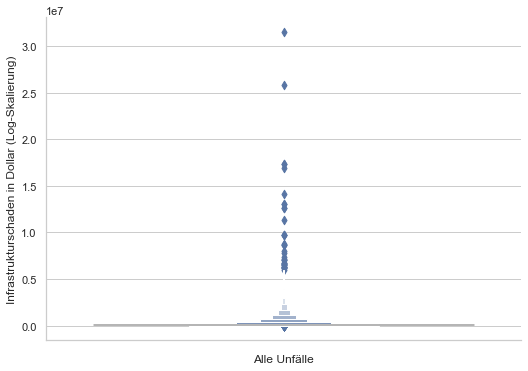

In [6]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
#plt.yscale("log")
ax.set_ylabels("Infrastrukturschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Boxplot_Infrastrukturschaden.png', bbox_inches='tight')



#### Histogramm Infrastrukturschaden (ohne Ausreißer)¶

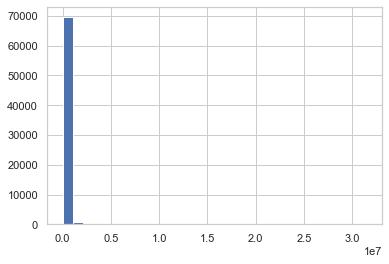

In [7]:
df['INFRASTRUCTURE_DMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Infrastrukturschaden.png', bbox_inches='tight')



#### Boxenplot Materialschaden

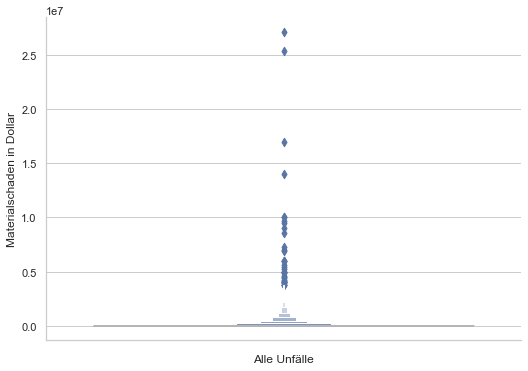

In [8]:
ax = sns.catplot(y='EQPDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Boxplot_Materialschaden.png', bbox_inches='tight')



#### Histogramm Materialschaden

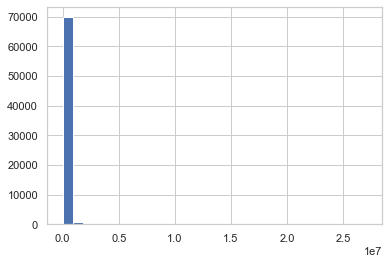

In [9]:
df['EQPDMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Materialschaden.png', bbox_inches='tight')



#### Boxenplot Streckenschaden

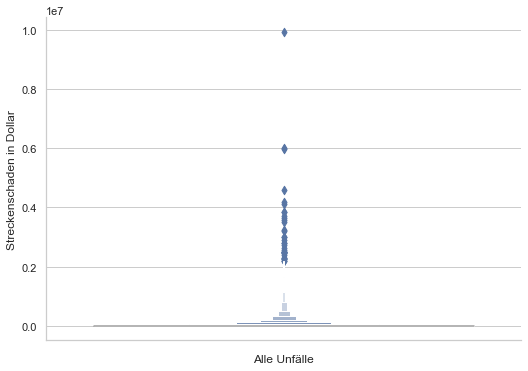

In [10]:
ax = sns.catplot(y='TRKDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Streckenschaden in Dollar")
ax.set_xlabels("Alle Unfälle")
plt.savefig('Images/Boxplot_Streckenschaden.png', bbox_inches='tight')



#### Histogramm Materialschaden

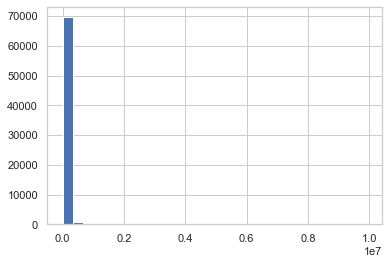

In [11]:
df['TRKDMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Streckenschaden.png', bbox_inches='tight')



#### Entfernung der Ausreißer <a class="anchor" id="ausreißer-delete"></a>

In [12]:
df.shape[0]

70759

In [13]:
std_dev = 2
df = df[(np.abs(stats.zscore(df[['SPEED', 'TONS', 'LOCOMOTIVES1','LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2','LOADF2', 'EMPTYF2', 'INFRASTRUCTURE_DMG']])) < float(std_dev)).all(axis=1)]

In [14]:
df.shape[0]

48759

### Häufigkeiten <a class="anchor" id="frequencies"></a>

In [15]:
def bar_values(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',d').replace(",","."), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    sns.despine()
    return ax



#### Häufigkeiten Zugart <a class="anchor" id="freq-zugart"></a>

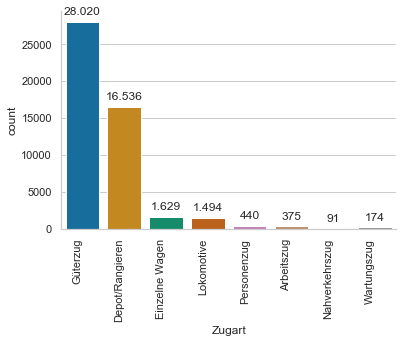

In [16]:
#fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x="EQUIPMENT_TYPE", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Zugart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, horizontalalignment='right')
plt.savefig('Images/Count_Zugart.png', bbox_inches='tight')



#### Häufigkeiten Unfallart <a class="anchor" id="freq-unfallart"></a>

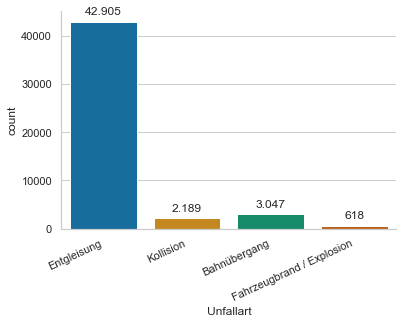

In [17]:
ax = sns.countplot(x="ACCIDENT_TYPE", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=25, horizontalalignment='right')
plt.savefig('Images/Count_Unfallart.png', bbox_inches='tight')



#### Häufigkeiten Streckenart <a class="anchor" id="freq-streckenart"></a>

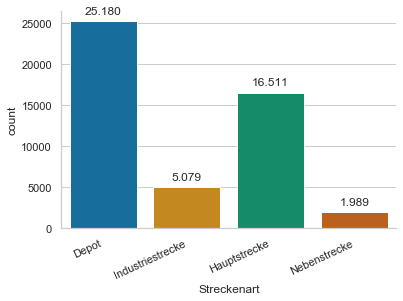

In [18]:
ax = sns.countplot(x="TYPTRK", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Streckenart")
ax.set_xticklabels(ax.get_xticklabels(),rotation=25, horizontalalignment='right')
plt.savefig('Images/Count_Streckenart.png', bbox_inches='tight')



#### Häufigkeiten Unfallursache <a class="anchor" id="freq-cause"></a>

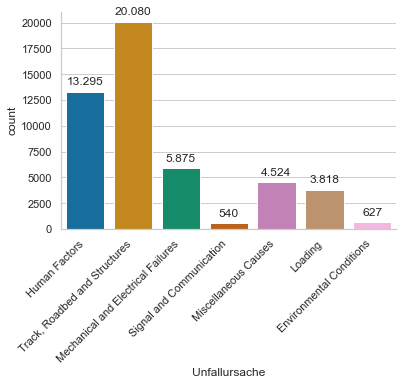

In [19]:
#fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x="ACCCAUSE_LVL2", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallursache")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.savefig('Images/Count_Unfallursache.png', bbox_inches='tight')



#### Häufigkeiten Unfallursache Lvl 1 (eingefärbt nach Unfallursache Lvl2 und gruppiert nach Unfallart) <a class="anchor" id="freq-cause_lvl1_lvl2_unfallart"></a>

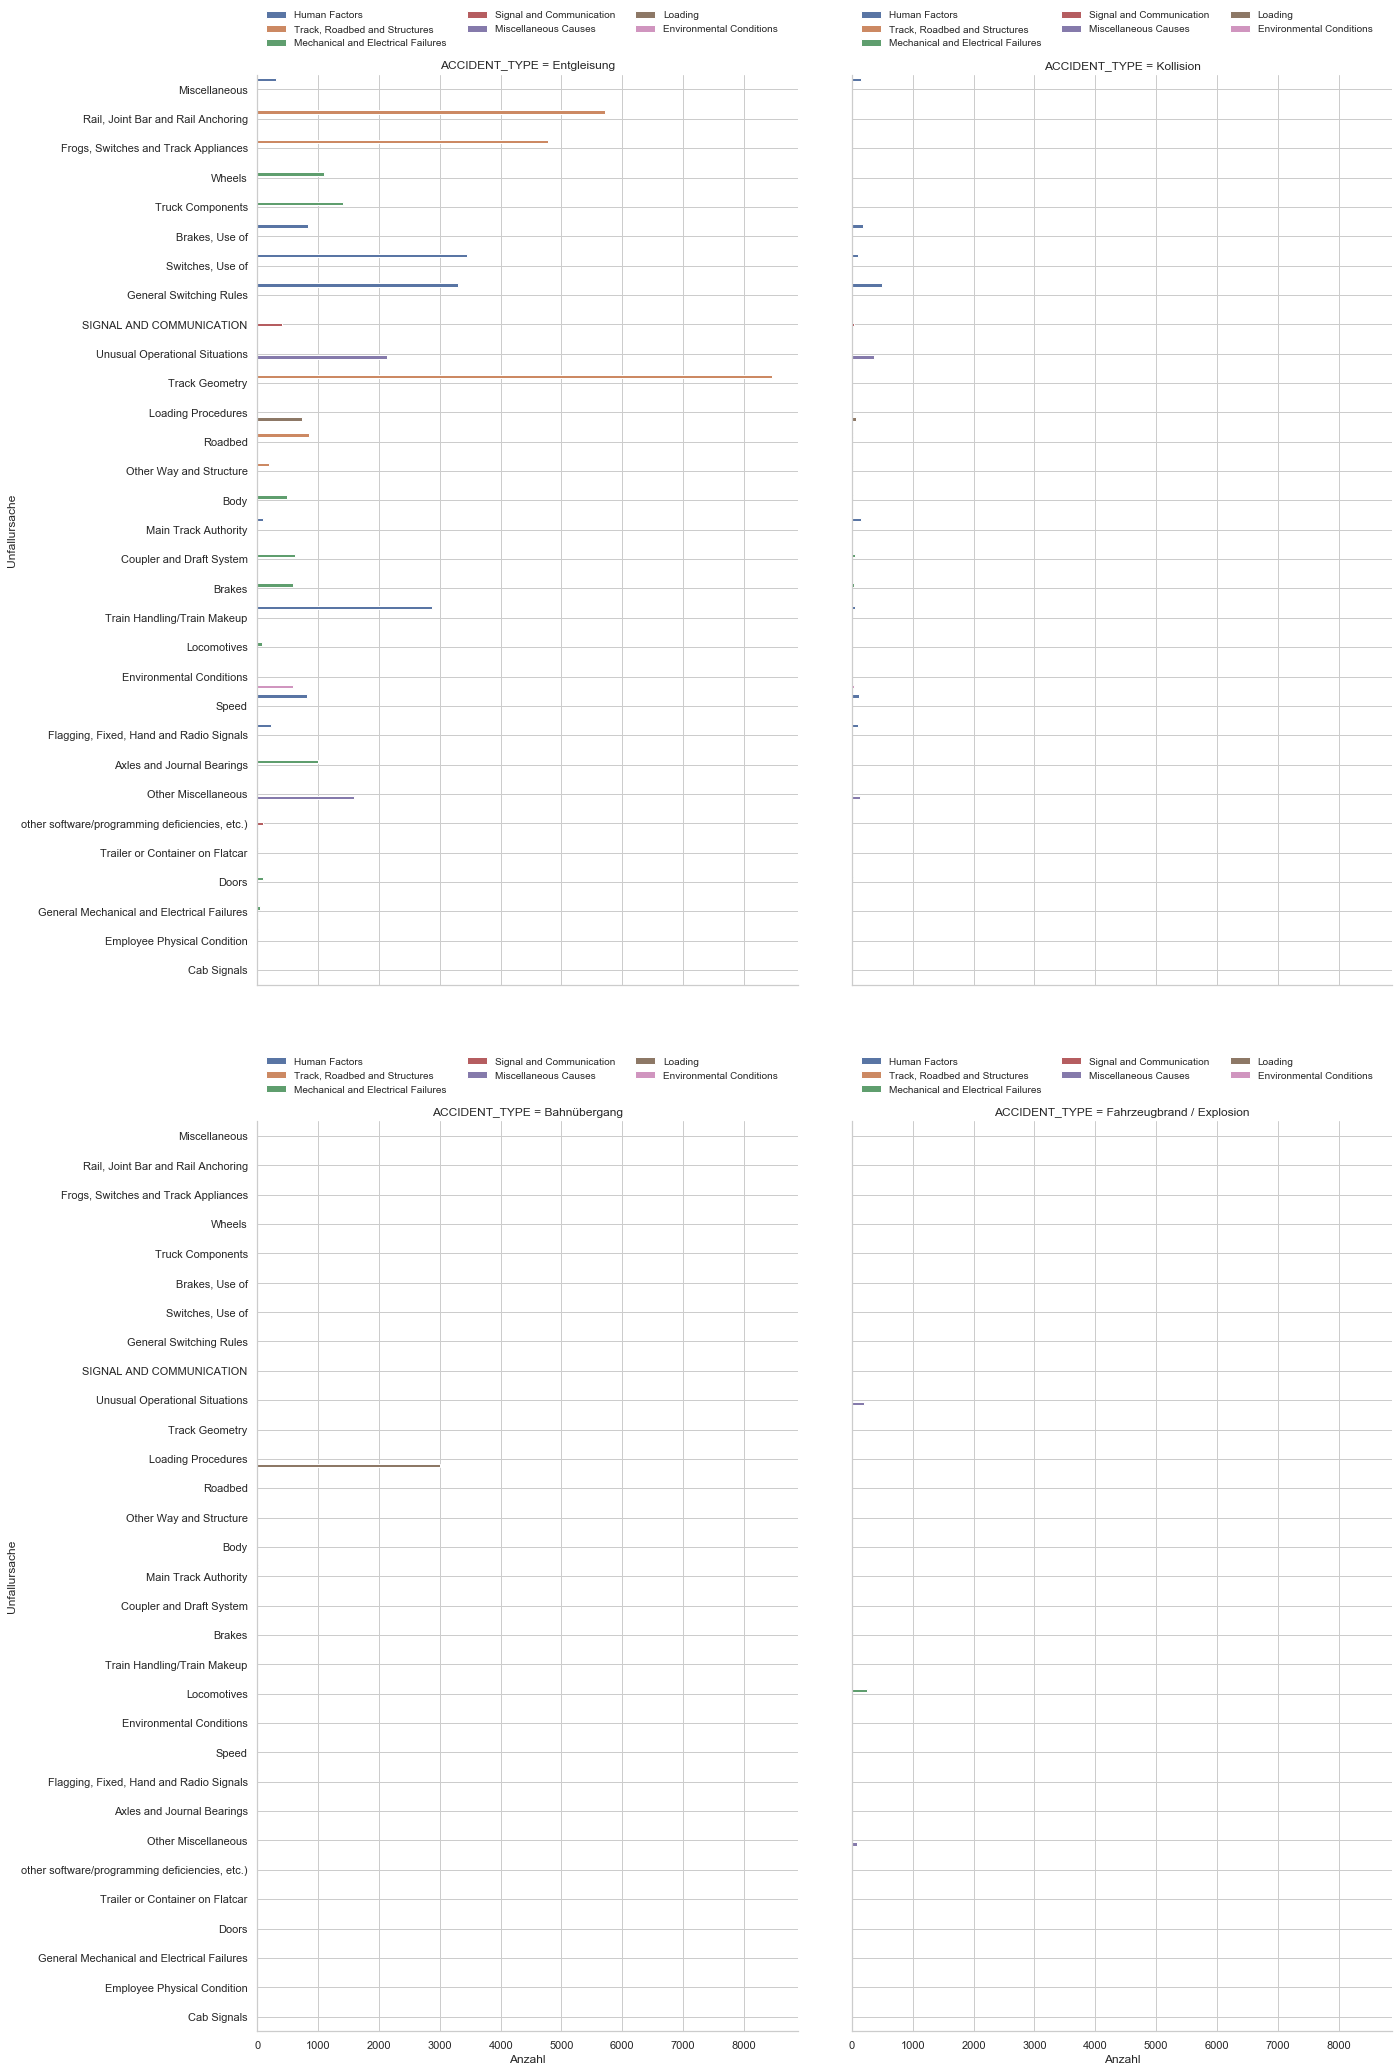

In [20]:
bp = sns.catplot(y="ACCCAUSE_LVL1", hue="ACCCAUSE_LVL2", data=df, kind="count", col="ACCIDENT_TYPE", col_wrap=2, height=14, aspect=0.7, legend=False, legend_out=False)
bp.set_xlabels('Anzahl', fontsize=12)
bp.set_ylabels('Unfallursache', fontsize=12)
for ax in bp.axes:
    ax.legend(bbox_to_anchor=(0, 1.08), loc='upper left', ncol=3, frameon=False, fontsize=10)
    ax.grid(axis='y')
    #plt.setp(ax.get_xticklabels(), visible=True)
    #ax.set_xticks([0,1,2,3,4,5], ax.get_xticklabels())
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.savefig('Images/Count_Unfallursache_Unfallart.png', bbox_inches='tight')



#### Häufigkeiten Unfallschwere <a class="anchor" id="freq-acctype"></a>

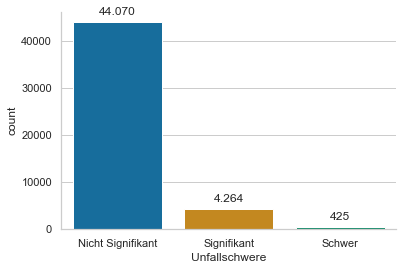

In [21]:
ax = sns.countplot(x="ACCTYPE", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Unfallschwere")
plt.savefig('Images/Count_Unfallschwere.png', bbox_inches='tight')



#### Häufigkeiten Unfallschwere (nach Zugart)  <a class="anchor" id="freq-acctype_cause"></a>

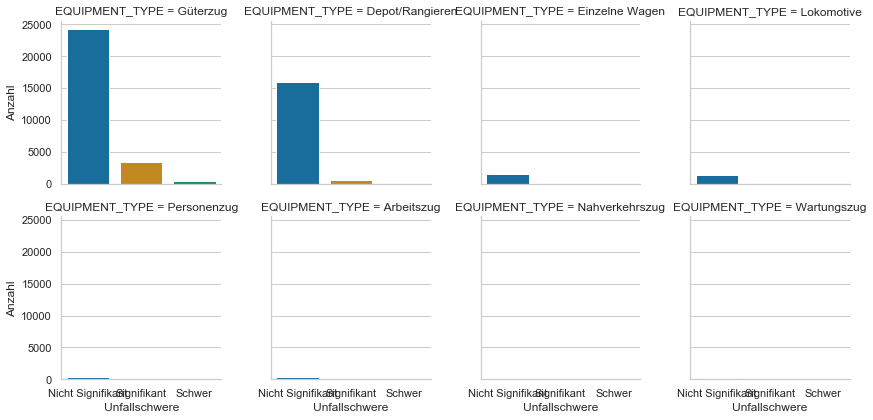

In [22]:
cp = sns.catplot(x="ACCTYPE", data=df, col="EQUIPMENT_TYPE", palette="colorblind", kind="count", col_wrap=4, height=3, aspect=1)
cp.set_xlabels('Unfallschwere', fontsize=12)
cp.set_ylabels('Anzahl', fontsize=12)
plt.savefig('Images/Count_Unfallschwere_Zugart.png', bbox_inches='tight')



#### Häufigkeiten Wetter <a class="anchor" id="freq-wetter"></a>

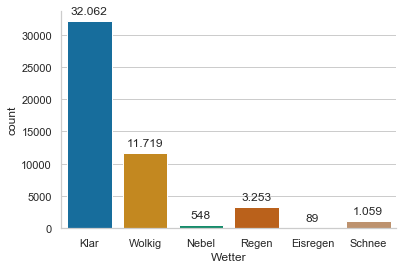

In [23]:
ax = sns.countplot(x="WEATHER", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Wetter")
plt.savefig('Images/Count_Wetter.png', bbox_inches='tight')



#### Häufigkeiten Jahreszeit <a class="anchor" id="freq-jahreszeit"></a>

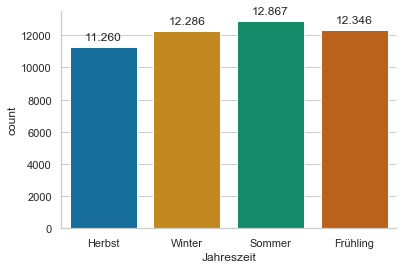

In [24]:
ax = sns.countplot(x="Jahreszeit", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Jahreszeit")
plt.savefig('Images/Count_Jahreszeit.png', bbox_inches='tight')



#### Häufigkeiten Jahr <a class="anchor" id="freq-jahr"></a>

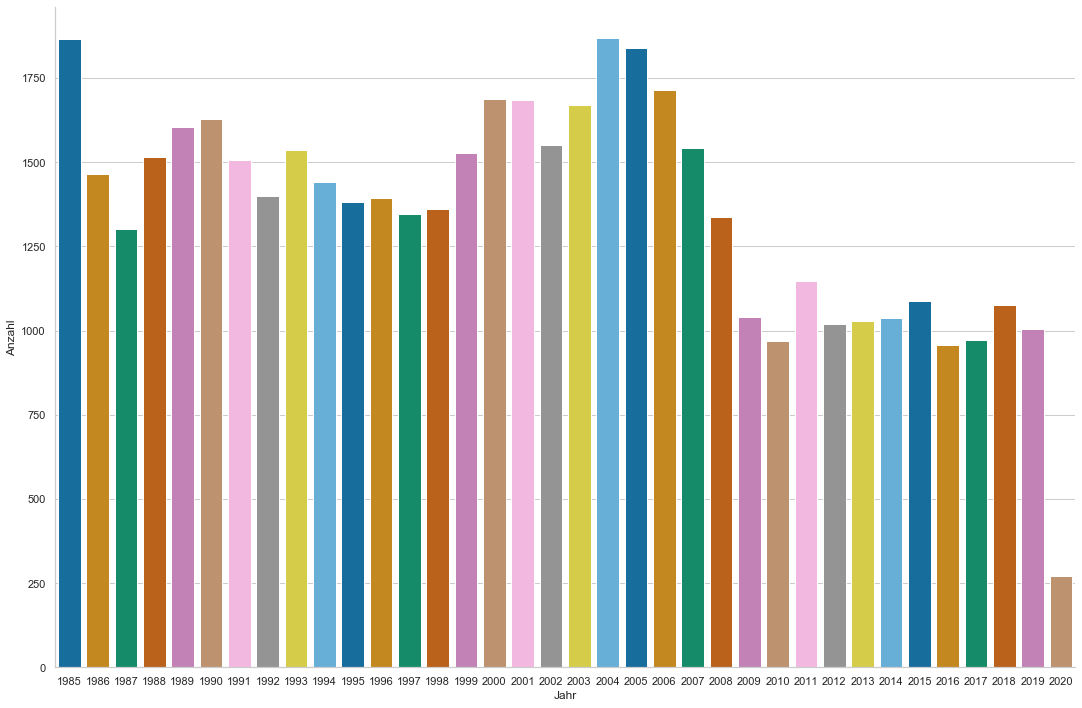

In [25]:
bp = sns.catplot(x="YEAR4", data=df, kind="count", height=10, aspect=1.5, palette="colorblind")
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Anzahl', fontsize=12)
plt.savefig('Images/Count_Jahr.png', bbox_inches='tight')



#### Häufigkeiten Jahr (nach Unfallart) <a class="anchor" id="freq-jahr_unfallart"></a>


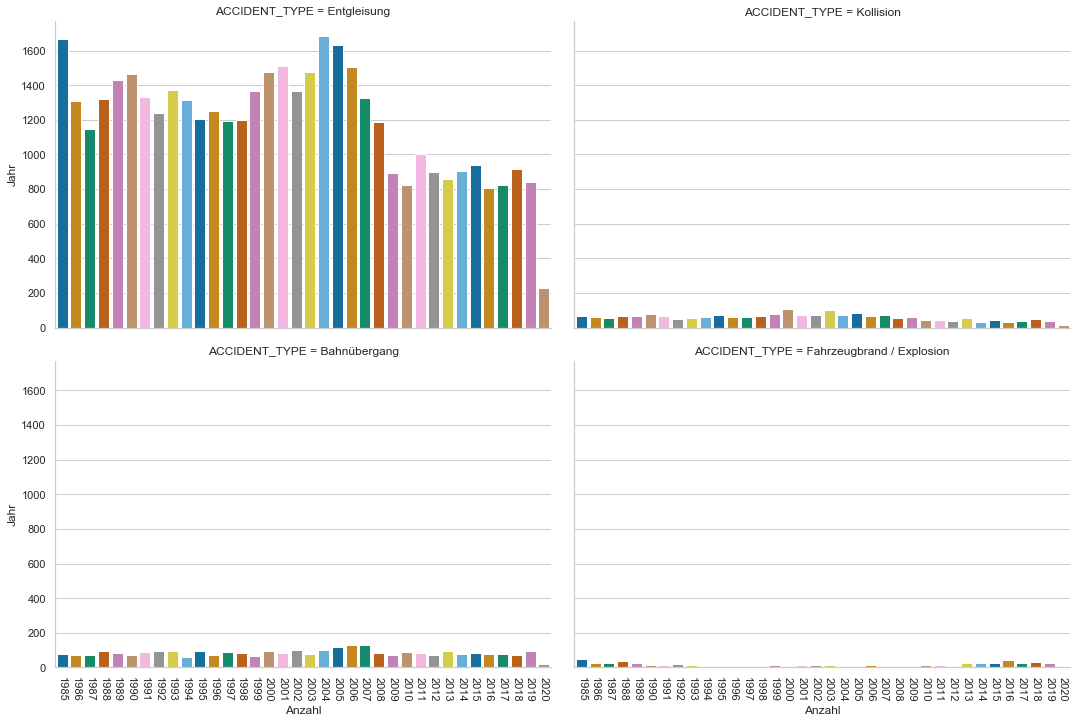

In [26]:
bp = sns.catplot(x="YEAR4", data=df, kind="count", col="ACCIDENT_TYPE", col_wrap=2, height=5, aspect=1.5, palette="colorblind")
bp.set_ylabels('Jahr', fontsize=12)
bp.set_xlabels('Anzahl', fontsize=12)
for x in bp.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
plt.savefig('Images/Count_Jahr_Unfallart.png', bbox_inches='tight')



#### Häufigkeiten Temperatur <a class="anchor" id="freq-temp"></a>

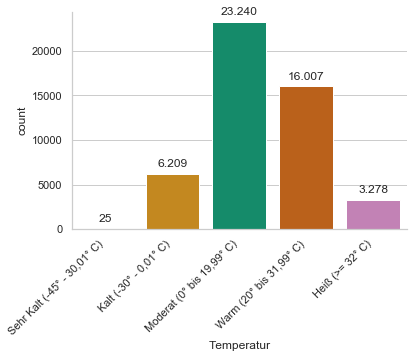

In [27]:
temp_order = ["Sehr Kalt (-45° - 30,01° C)", "Kalt (-30° - 0,01° C)", "Moderat (0° bis 19,99° C)", "Warm (20° bis 31,99° C)", "Heiß (>= 32° C)"]
ax = sns.countplot(x="TEMP_CLUSTER", data=df, palette="colorblind", order=temp_order)
ax = bar_values(ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_xlabel("Temperatur")
plt.savefig('Images/Count_Temperatur.png', bbox_inches='tight')



#### Häufigkeiten Temperatur (nach Unfallursache) <a class="anchor" id="freq-temp_cause"></a>

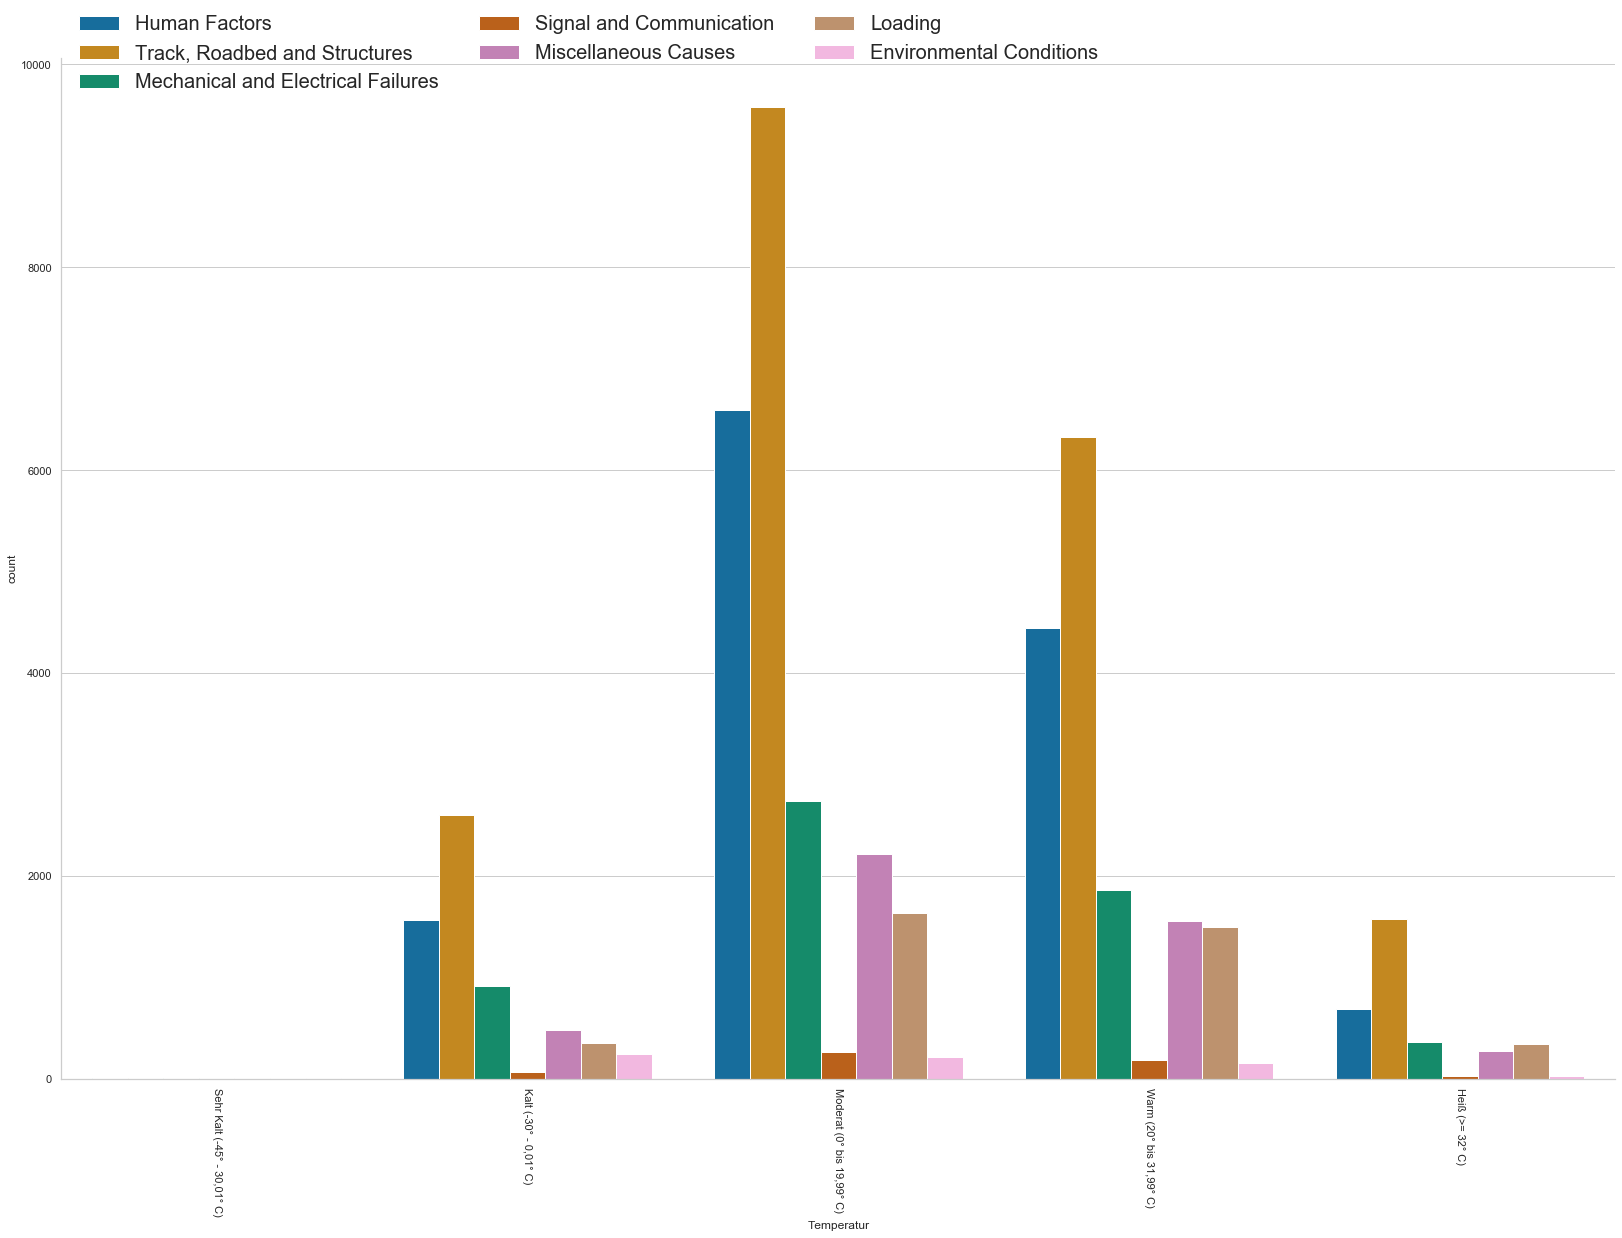

In [28]:
ax = sns.catplot(x="TEMP_CLUSTER", hue="ACCCAUSE_LVL2", kind="count", data=df, palette='colorblind', order=temp_order, legend=False, height=15, aspect=1.5)
for x in ax.axes.flat:
    x.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=3, frameon=False, fontsize=20)
    for label in x.get_xticklabels():
        label.set_rotation(-90)   
ax.set_xlabels("Temperatur")
plt.savefig('Images/Count_Temperatur_Unfallursache.png', bbox_inches='tight')



#### Häufigkeiten Sichtbarkeit <a class="anchor" id="freq-vis"></a>

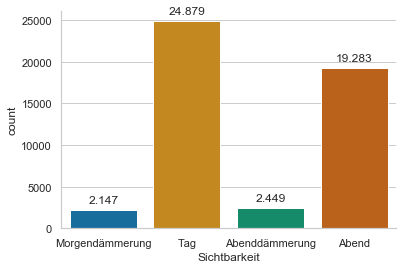

In [29]:
vis_order = ["Morgendämmerung", "Tag", "Abenddämmerung", "Abend"]
ax = sns.countplot(x="VISIBLTY", data=df, palette="colorblind", order=vis_order)
ax = bar_values(ax)
ax.set_xlabel("Sichtbarkeit")
plt.savefig('Images/Count_Sichtbarkeit.png', bbox_inches='tight')



#### Häufigkeiten zu hohe Zuggeschwindigkeit <a class="anchor" id="freq-speed"></a>

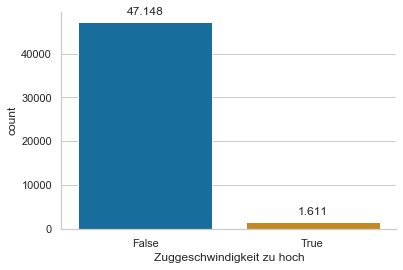

In [30]:
ax = sns.countplot(x="SPD_TOO_HIGH", data=df, palette="colorblind")
ax = bar_values(ax)
ax.set_xlabel("Zuggeschwindigkeit zu hoch")
plt.savefig('Images/Count_Zug_zu_schnell.png', bbox_inches='tight')



### Verteilungstabellen <a class="anchor" id="tables"></a>



#### Verteilungstabelle Zugart nach Unfallart <a class="anchor" id="tables_eqtype_type"></a>

In [31]:
format_dict = {'Commuter Train':'{:.2f}%', 'Cut of Cars': '{:.2f}%', 'Freight Train': '{:.2f}%', 
               'Locomotive': '{:.2f}%', 'Passenger Train': '{:.2f}%', 'Single Car': '{:.2f}%', 'Work Train': '{:.2f}%',
               'Yard/Switching': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["ACCIDENT_TYPE"],  columns=df["EQUIPMENT_TYPE"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)
freq_tab.to_clipboard(excel = False, sep = ', ') 

/Users/julianjetz/anaconda3/lib/python3.7/site-packages/pandas/io/clipboards.py:127: UserWarning: to_clipboard with excel=False ignores the sep argument
  warnings.warn("to_clipboard with excel=False ignores the sep argument")




#### Verteilungstabelle Unfallart nach Zugart <a class="anchor" id="tables_type_eqtype"></a>

In [32]:
format_dict = {'Collision':'{:.2f}%', 'Crossing': '{:.2f}%', 'Derailment': '{:.2f}%', 
               'Fire / Violent RuptureViolent rupture / Explosive Detonation': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab_eqtype_type = pd.crosstab(index=df["EQUIPMENT_TYPE"],  columns=df["ACCIDENT_TYPE"], margins=True)
(freq_tab_eqtype_type/freq_tab_eqtype_type.loc["All"]*100).style.format(format_dict)

ACCIDENT_TYPE,Bahnübergang,Entgleisung,Fahrzeugbrand / Explosion,Kollision,All
EQUIPMENT_TYPE,,,,,
Arbeitszug,1.11585,0.708542,1.45631,1.27912,0.77%
Depot/Rangieren,3.64293,36.5575,4.04531,32.6633,33.91%
Einzelne Wagen,1.83787,2.8668,25.0809,8.5884,3.34%
Güterzug,82.1792,56.6088,50.4854,41.8456,57.47%
Lokomotive,3.97112,2.74793,6.95793,6.89813,3.06%
Nahverkehrszug,1.31277,0.0699219,0.647249,0.77661,0.19%
Personenzug,4.6275,0.296003,9.38511,5.20786,0.90%
Wartungszug,1.31277,0.144505,1.94175,2.74098,0.36%
All,100,100,100,100,100.00%


In [33]:
format_dict = {'Environmental Conditions':'{:.2f}%', 'Human Factors': '{:.2f}%', 'Loading': '{:.2f}%', 
               'Mechanical and Electrical Failures': '{:.2f}%', 'Miscellaneous Causes': '{:.2f}%', 
               'Signal and Communication': '{:.2f}%', 'Track, Roadbed and Structures': '{:.2f}%',
               'All': '{:.2f}%'}



#### Verteilungstabelle Unfallart  nach Unfallursache <a class="anchor" id="tables_zugart_cause"></a>

In [34]:
freq_tab = pd.crosstab(index=df["ACCIDENT_TYPE"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
ACCIDENT_TYPE,,,,,,,,
Bahnübergang,0.00%,0.23%,78.65%,0.00%,0.27%,0.00%,0.00%,6.25%
Entgleisung,92.82%,89.58%,19.43%,92.65%,82.25%,93.52%,99.62%,87.99%
Fahrzeugbrand / Explosion,0.48%,0.08%,0.10%,5.02%,6.56%,0.00%,0.04%,1.27%
Kollision,6.70%,10.11%,1.81%,2.33%,10.92%,6.48%,0.34%,4.49%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Zugart  <a class="anchor" id="tables_zugart_typtrk"></a>

In [35]:
freq_tab = pd.crosstab(index=df["TYPTRK"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
TYPTRK,,,,,,,,
Depot,38.28%,69.17%,9.22%,33.72%,55.48%,87.41%,51.94%,51.64%
Hauptstrecke,35.73%,17.52%,85.83%,59.30%,31.32%,8.15%,28.57%,33.86%
Industriestrecke,21.85%,9.50%,3.61%,3.47%,9.31%,2.59%,14.45%,10.42%
Nebenstrecke,4.15%,3.81%,1.34%,3.51%,3.89%,1.85%,5.04%,4.08%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach State <a class="anchor" id="tables_state_cause"></a>

In [36]:
freq_tab = pd.crosstab(index=df["STATE"],  columns=df["ACCCAUSE_LVL2"], margins=True)
((freq_tab/freq_tab.loc["All"]*100).sort_values(by=['All'], ascending=False)).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
STATE,,,,,,,,
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Texas,6.06%,11.15%,15.27%,10.40%,10.50%,10.93%,12.16%,11.67%
Illinois,7.34%,11.55%,4.50%,7.66%,9.70%,10.19%,8.28%,8.94%
Kalifornien,3.83%,6.09%,4.48%,4.70%,7.91%,7.04%,5.06%,5.53%
Ohio,4.15%,3.85%,3.40%,3.68%,3.51%,5.37%,3.80%,3.77%
Pennsylvania,2.87%,3.21%,3.61%,3.52%,3.71%,3.89%,3.63%,3.50%
Louisiana,0.80%,2.85%,4.56%,2.57%,2.52%,1.85%,3.84%,3.29%
Iowa,4.78%,2.43%,2.41%,2.96%,2.21%,0.19%,3.93%,3.09%
Minnesota,3.83%,2.52%,2.59%,3.05%,3.25%,3.70%,3.32%,3.01%




#### Verteilungstabelle Unfallursache nach Wetter <a class="anchor" id="tables_weather_cause"></a>

In [37]:
freq_tab = pd.crosstab(index=df["WEATHER"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
WEATHER,,,,,,,,
Eisregen,0.64%,0.17%,0.18%,0.15%,0.09%,0.19%,0.21%,0.18%
Klar,40.99%,67.52%,70.34%,65.64%,67.78%,63.15%,64.23%,65.80%
Nebel,1.59%,1.15%,1.89%,1.38%,1.24%,0.37%,0.87%,1.12%
Regen,21.37%,6.40%,5.53%,5.33%,6.42%,7.59%,7.04%,6.68%
Schnee,13.88%,2.06%,1.55%,2.90%,1.68%,2.41%,1.89%,2.17%
Wolkig,21.53%,22.70%,20.51%,24.60%,22.79%,26.30%,25.75%,24.05%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Jahreszeit <a class="anchor" id="tables_jahreszeit_cause"></a>

In [38]:
freq_tab = pd.crosstab(index=df["Jahreszeit"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
Jahreszeit,,,,,,,,
Frühling,16.75%,25.57%,25.28%,26.45%,26.39%,25.56%,24.86%,25.32%
Herbst,15.63%,23.58%,24.62%,21.36%,21.68%,22.22%,23.56%,23.09%
Sommer,19.30%,26.79%,27.13%,26.38%,28.09%,24.81%,25.86%,26.39%
Winter,48.33%,24.06%,22.97%,25.80%,23.83%,27.41%,25.72%,25.20%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Temperatur <a class="anchor" id="tables_cause_temp"></a>

In [39]:
freq_tab = pd.crosstab(index=df["TEMP_CLUSTER"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
TEMP_CLUSTER,,,,,,,,
Heiß (>= 32° C),3.19%,5.18%,8.98%,6.08%,6.08%,4.26%,7.82%,6.72%
"Kalt (-30° - 0,01° C)",38.44%,11.76%,9.17%,15.59%,10.52%,12.41%,12.93%,12.73%
"Moderat (0° bis 19,99° C)",33.49%,49.61%,42.72%,46.62%,48.98%,48.89%,47.73%,47.66%
"Sehr Kalt (-45° - 30,01° C)",0.80%,0.07%,0.00%,0.09%,0.02%,0.00%,0.02%,0.05%
"Warm (20° bis 31,99° C)",24.08%,33.39%,39.13%,31.63%,34.39%,34.44%,31.49%,32.83%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Unfallursache nach Sichtbarkeit <a class="anchor" id="tables_vis_cause"></a>

In [40]:
freq_tab = pd.crosstab(index=df["VISIBLTY"],  columns=df["ACCCAUSE_LVL2"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

ACCCAUSE_LVL2,Environmental Conditions,Human Factors,Loading,Mechanical and Electrical Failures,Miscellaneous Causes,Signal and Communication,"Track, Roadbed and Structures",All
VISIBLTY,,,,,,,,
Abend,46.09%,45.70%,22.89%,41.45%,41.47%,42.22%,37.38%,39.55%
Abenddämmerung,6.86%,5.39%,3.40%,4.94%,5.90%,6.48%,4.82%,5.02%
Morgendämmerung,3.19%,4.79%,4.35%,4.65%,4.58%,5.00%,4.07%,4.40%
Tag,43.86%,44.11%,69.36%,48.97%,48.05%,46.30%,53.74%,51.03%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%




#### Verteilungstabelle Sichtbarkeit nach Unfallursache  <a class="anchor" id="tables_cause_vis"></a>

In [41]:
format_dict = {'Dark':'{:.2f}%', 'Dawn': '{:.2f}%', 'Day': '{:.2f}%', 
               'Dusk': '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["ACCCAUSE_LVL2"],  columns=df["VISIBLTY"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

VISIBLTY,Abend,Abenddämmerung,Morgendämmerung,Tag,All
ACCCAUSE_LVL2,,,,,
Environmental Conditions,1.49873,1.75582,0.931532,1.10535,1.29%
Human Factors,31.5096,29.2773,29.6693,23.5741,27.27%
Loading,4.53249,5.30829,7.73172,10.6435,7.83%
Mechanical and Electrical Failures,12.6277,11.8416,12.7154,11.564,12.05%
Miscellaneous Causes,9.72878,10.9024,9.64136,8.73829,9.28%
Signal and Communication,1.18239,1.42915,1.25757,1.00486,1.11%
"Track, Roadbed and Structures",38.9203,39.4855,38.0531,43.3699,41.18%
All,100,100,100,100,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Unfallart  <a class="anchor" id="tables_speed_acctype"></a>

In [42]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["ACCIDENT_TYPE"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
ACCIDENT_TYPE,,,
Bahnübergang,6.26%,5.90%,6.25%
Entgleisung,87.99%,88.14%,87.99%
Fahrzeugbrand / Explosion,1.29%,0.56%,1.27%
Kollision,4.46%,5.40%,4.49%
All,100.00%,100.00%,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Streckenart  <a class="anchor" id="tables_speed_typtrk"></a>

In [43]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["TYPTRK"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
TYPTRK,,,
Depot,52.36%,30.54%,51.64%
Hauptstrecke,33.07%,57.17%,33.86%
Industriestrecke,10.53%,7.08%,10.42%
Nebenstrecke,4.04%,5.21%,4.08%
All,100.00%,100.00%,100.00%




#### Verteilungstabelle Geschwindigkeitsüberschreitung nach Zugart  <a class="anchor" id="tables_speed_eqtype"></a>

In [44]:
format_dict = {False:'{:.2f}%', True: '{:.2f}%', 'All': '{:.2f}%'}
freq_tab = pd.crosstab(index=df["EQUIPMENT_TYPE"],  columns=df["SPD_TOO_HIGH"], margins=True)
(freq_tab/freq_tab.loc["All"]*100).style.format(format_dict)

SPD_TOO_HIGH,False,True,All
EQUIPMENT_TYPE,,,
Arbeitszug,0.77%,0.68%,0.77%
Depot/Rangieren,34.55%,15.39%,33.91%
Einzelne Wagen,3.22%,7.01%,3.34%
Güterzug,56.93%,73.12%,57.47%
Lokomotive,3.09%,2.17%,3.06%
Nahverkehrszug,0.19%,0.12%,0.19%
Personenzug,0.89%,1.37%,0.90%
Wartungszug,0.36%,0.12%,0.36%
All,100.00%,100.00%,100.00%





### Boxenplots und Histogramme <a class="anchor" id="boxenplots"></a>

[Hadley Wickham: Letter-value plots: Boxplots for large data](https://doi.org/10.1080/10618600.2017.1305277)



#### Boxenplot Infrastrukturschaden (ohne Ausreißer) <a class="anchor" id="infrastrukturdmg"></a>


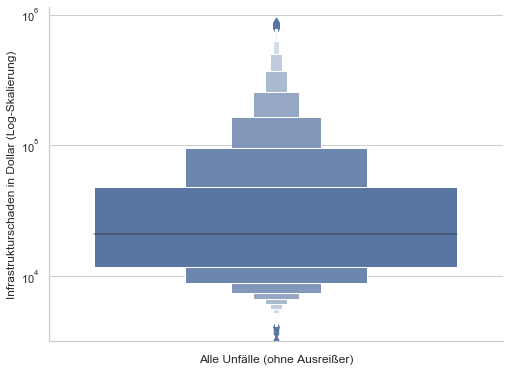

In [45]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
plt.yscale("log")
ax.set_ylabels("Infrastrukturschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Boxplot_Infrastrukturschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Histogramm Infrastrukturschaden (ohne Ausreißer)¶

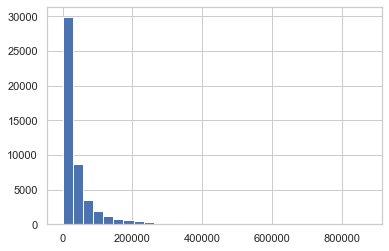

In [46]:
df['INFRASTRUCTURE_DMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Infrastrukturschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Boxenplot Materialschaden (ohne Ausreißer) <a class="anchor" id="EQPDMG"></a>

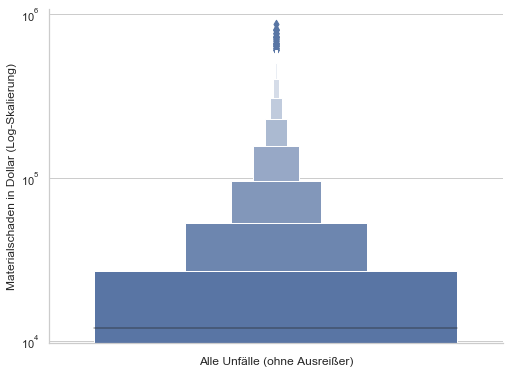

In [47]:
ax = sns.catplot(y='EQPDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
plt.yscale("log")
ax.set_ylabels("Materialschaden in Dollar (Log-Skalierung)")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Boxplot_Materialschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Histogramm Materialschaden (ohne Ausreißer)¶

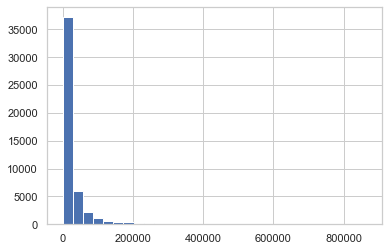

In [48]:
df['EQPDMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Materialschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Boxenplot Streckenchaden (ohne Ausreißer) <a class="anchor" id="TRKDMG"></a>

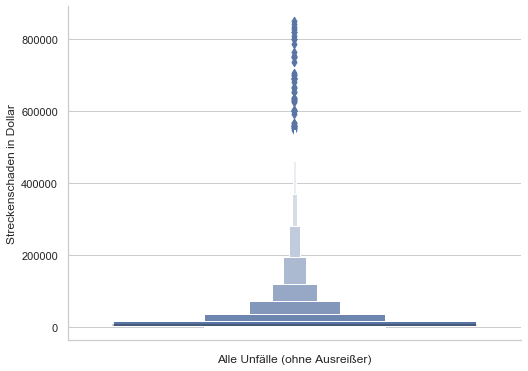

In [49]:
ax = sns.catplot(y='TRKDMG', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Streckenschaden in Dollar")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Boxplot_Streckenschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Histogramm Materialschaden (ohne Ausreißer)¶

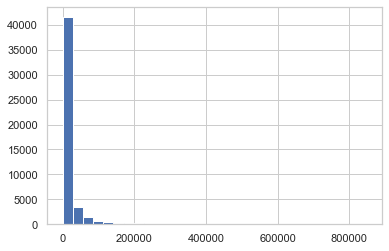

In [50]:
df['TRKDMG'].hist(bins=30)
plt.savefig('Images/Histogramm_Streckenschaden_ohne_Ausreißer.png', bbox_inches='tight')



#### Boxenplot Zuggeschwindigkeit <a class="anchor" id="zuggeschwindigkeit"></a>

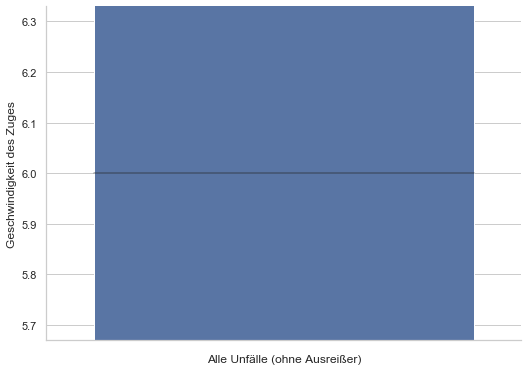

In [51]:
ax = sns.catplot(y='SPEED', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Geschwindigkeit des Zuges")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Boxplot_Zuggeschwindigkeit.png', bbox_inches='tight')



#### Histogramm Zuggeschwindigkeit

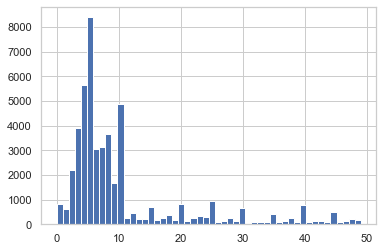

In [52]:
df['SPEED'].hist(bins=50)
plt.savefig('Images/Histogramm_Zuggeschwindigkeit.png')



#### Boxenplot Zuggewicht <a class="anchor" id="tons"></a>

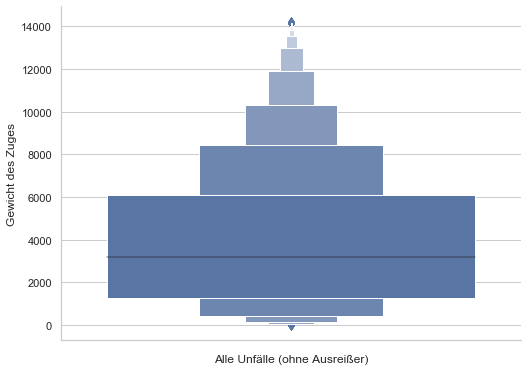

In [53]:
ax = sns.catplot(y='TONS', data=df, kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Gewicht des Zuges")
ax.set_xlabels("Alle Unfälle (ohne Ausreißer)")
plt.savefig('Images/Boxplot_Zuggewicht.png', bbox_inches='tight')



#### Histogramm Zuggewicht

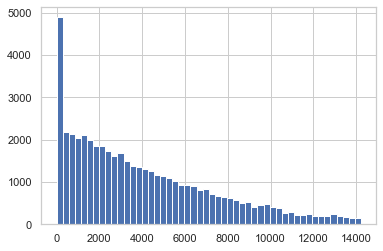

In [54]:
df['TONS'].hist(bins=50)
plt.savefig('Images/Histogramm_Zuggewicht.png', bbox_inches='tight')



#### Boxenplot Zugart und Geschwindigkeit <a class="anchor" id="zugart"></a>


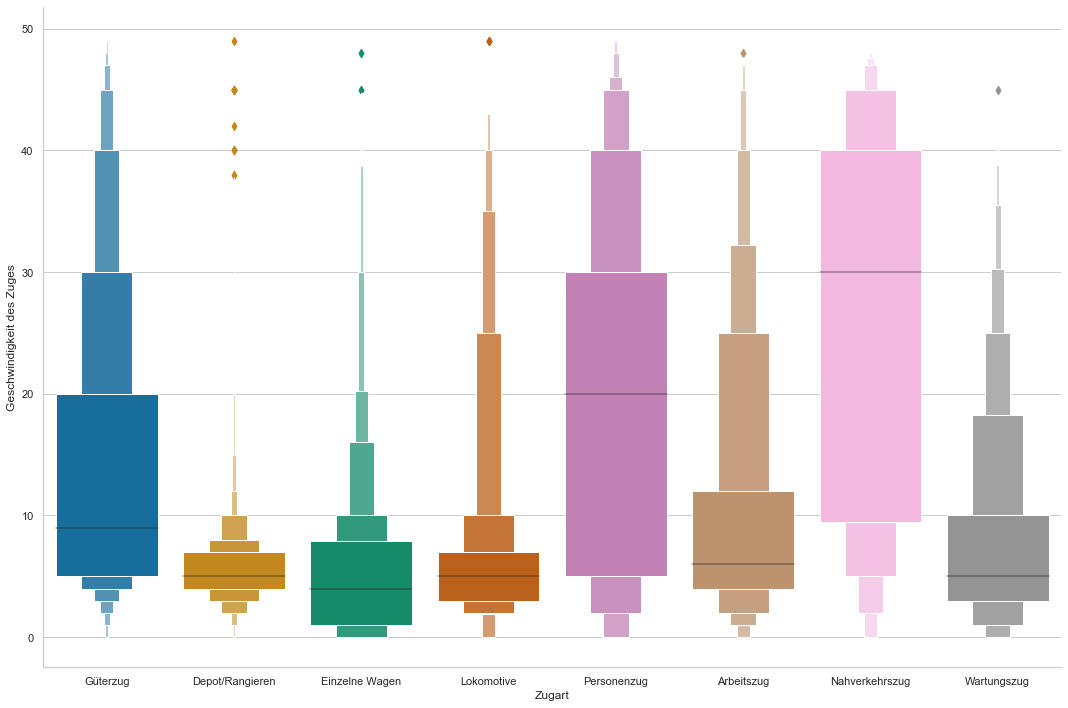

In [55]:
ax = sns.catplot(y='SPEED', x='EQUIPMENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Geschwindigkeit des Zuges")
ax.set_xlabels("Zugart")
plt.savefig('Images/Boxplot_Geschwindigkeit_Zugart.png', bbox_inches='tight')



#### Boxenplot Zugart und Gewicht

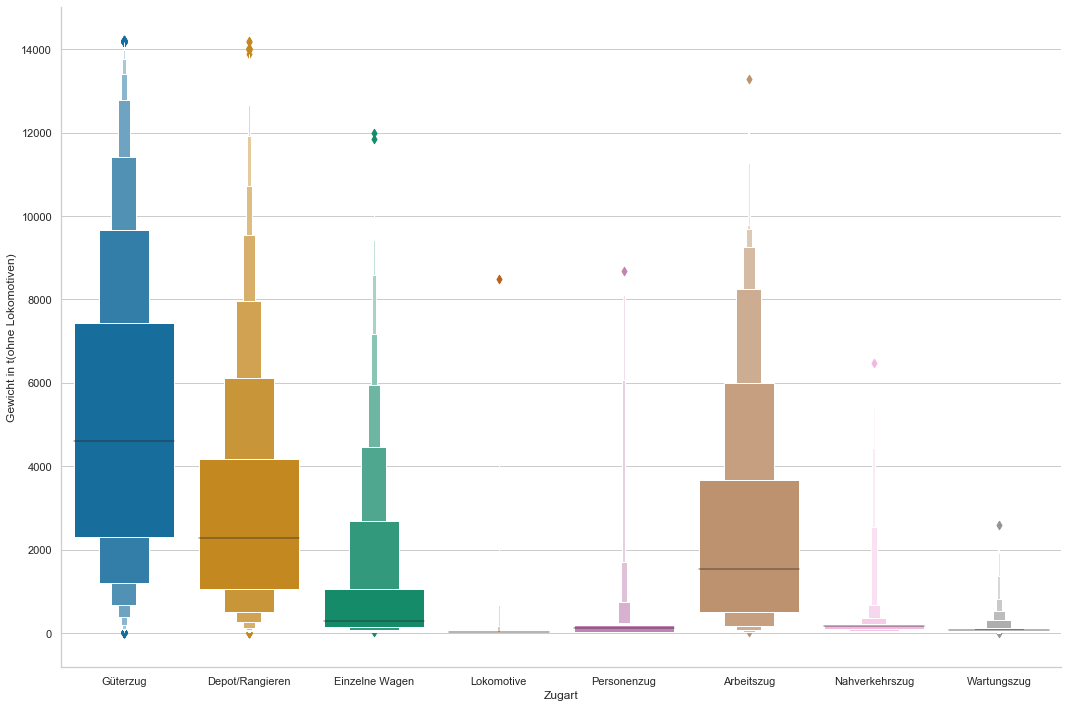

In [56]:
ax = sns.catplot(y='TONS', x='EQUIPMENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Gewicht in t(ohne Lokomotiven)")
ax.set_xlabels("Zugart")
plt.savefig('Images/Boxplot_Gewicht_Zugart.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Zugart

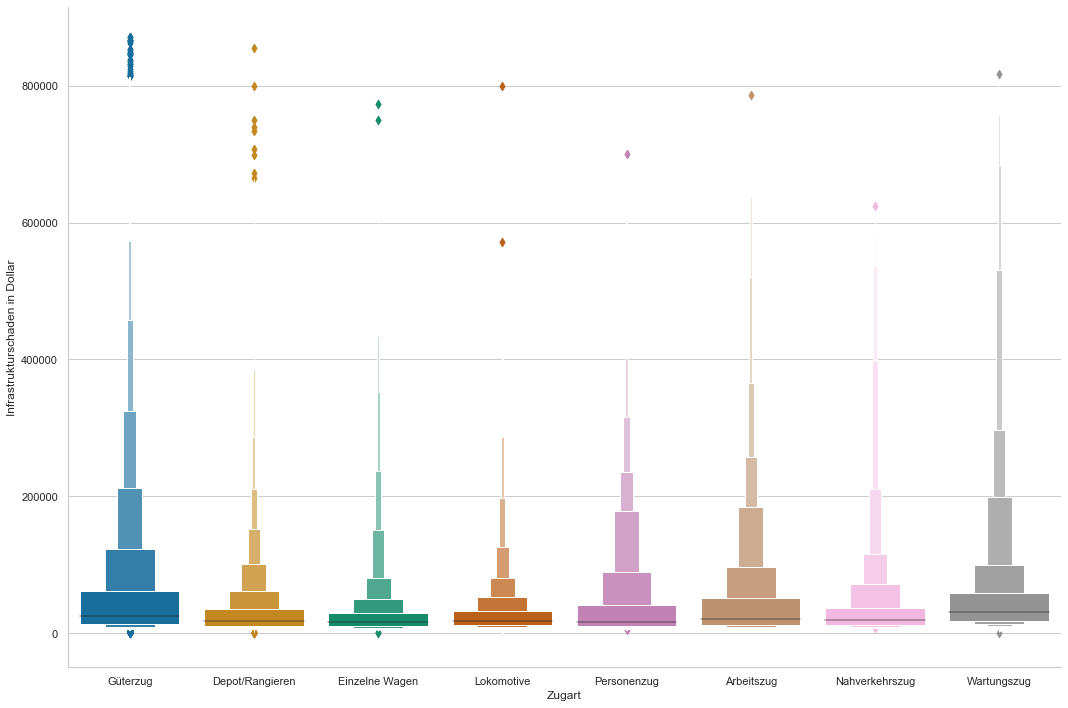

In [57]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='EQUIPMENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Zugart")
plt.savefig('Images/Boxplot_Infrastruktur_Zugart.png', bbox_inches='tight')





#### Boxenplot Materialschaden und Zugart

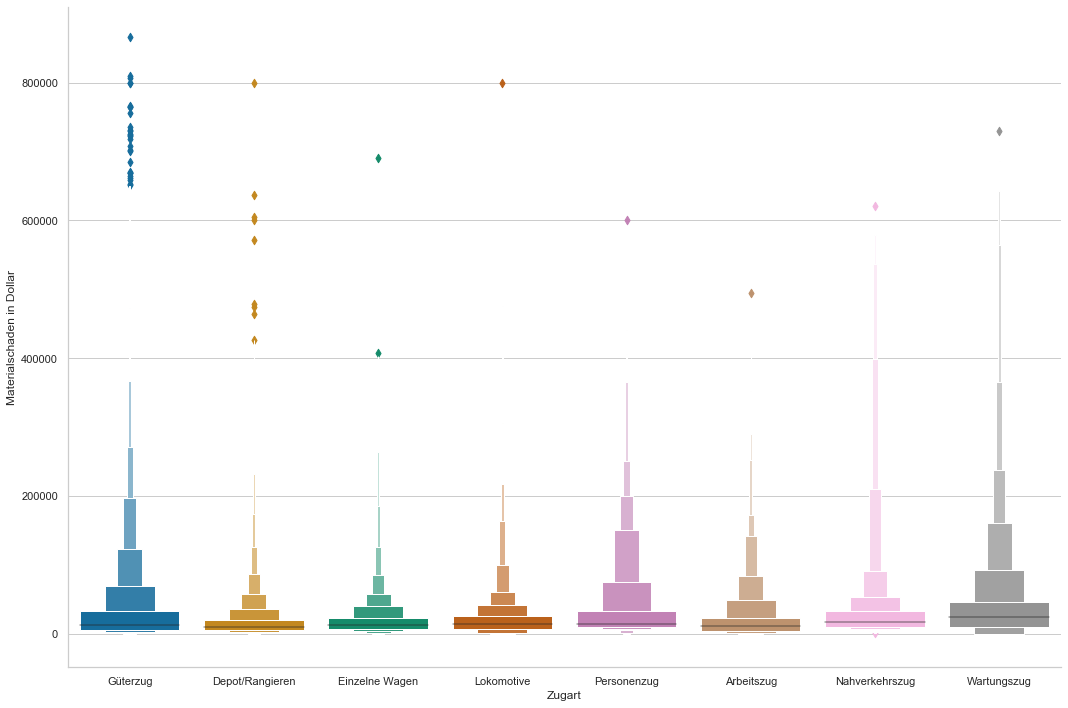

In [58]:
ax = sns.catplot(y='EQPDMG', x='EQUIPMENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Zugart")
plt.savefig('Images/Boxplot_Material_Zugart.png', bbox_inches='tight')






#### Anzahl Güterwagen

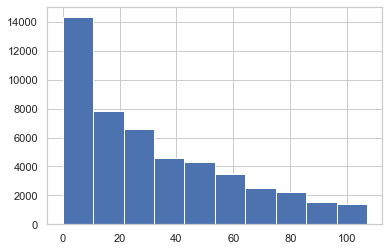

In [59]:
df['LOADF1'].hist(bins=10)
plt.savefig('Images/Histogramm_beladene_GW.png', bbox_inches='tight')

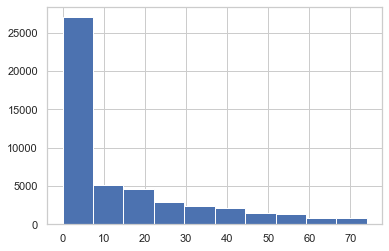

In [60]:
df['EMPTYF1'].hist(bins=10)
plt.savefig('Images/Histogramm_leere_GW.png', bbox_inches='tight')

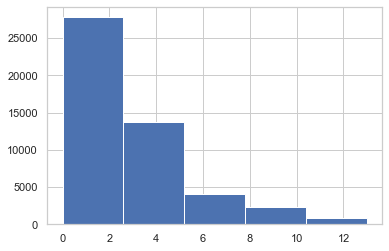

In [61]:
df['LOADF2'].hist(bins=5)
plt.savefig('Images/Histogramm_entgleiste_beladene_GW.png', bbox_inches='tight')

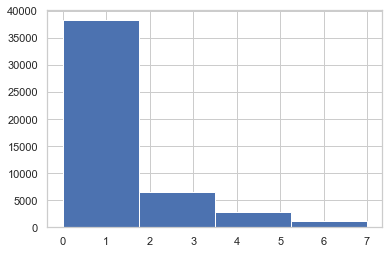

In [62]:
df['EMPTYF2'].hist(bins=4)
plt.savefig('Images/Histogramm_entgleiste_leere_GW.png', bbox_inches='tight')




#### Anzahl Personenwagen

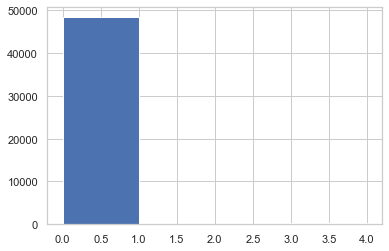

In [63]:
df['LOADP1'].hist(bins=4)
plt.savefig('Images/Histogramm_beladene_PW.png', bbox_inches='tight')

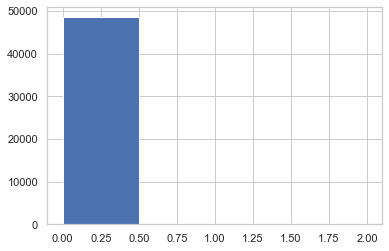

In [64]:
df['EMPTYP1'].hist(bins=4)
plt.savefig('Images/Histogramm_leere_PW.png', bbox_inches='tight')




#### Anzahl Lokomotiven

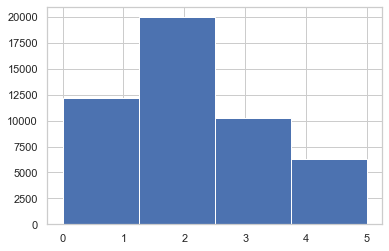

In [65]:
df['LOCOMOTIVES1'].hist(bins=4)
plt.savefig('Images/Histogramm_Lokomotiven.png', bbox_inches='tight')

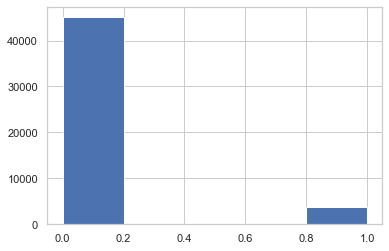

In [66]:
df['LOCOMOTIVES2'].hist(bins=5)
plt.savefig('Images/Histogramm_entgleiste_Lokomotiven.png', bbox_inches='tight')



#### Boxenplot Infrastrukturschaden und Unfallart <a class="anchor" id="unfallart"></a>


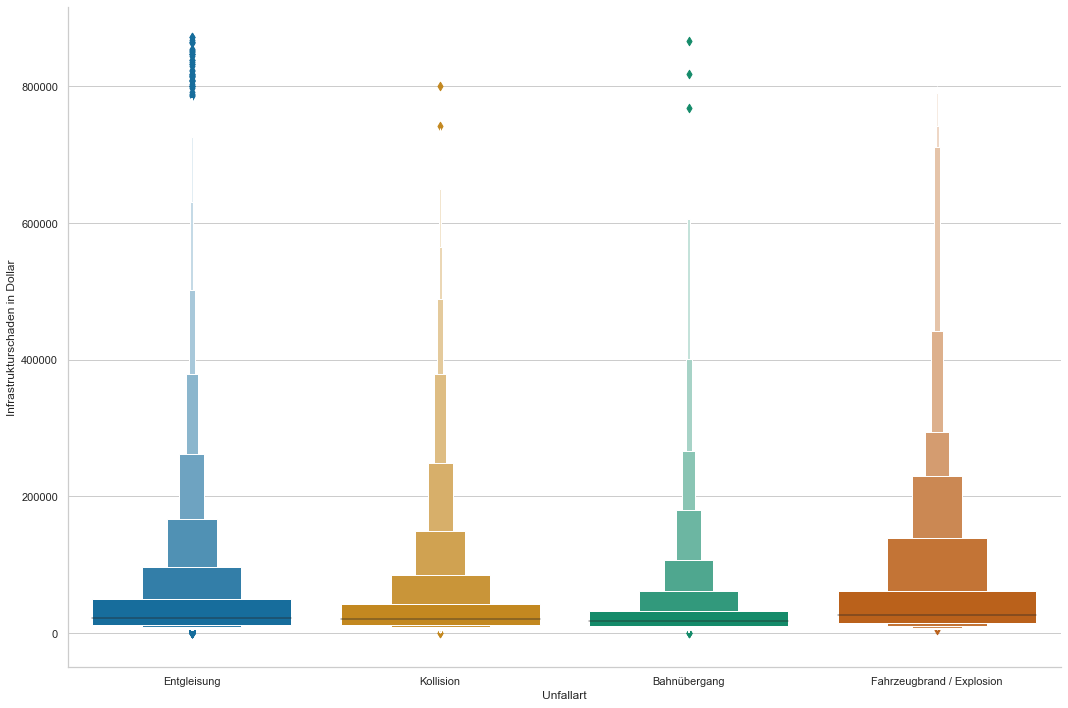

In [67]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCIDENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallart")
plt.savefig('Images/Boxplot_Infrastruktur_Unfallart.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Unfallart

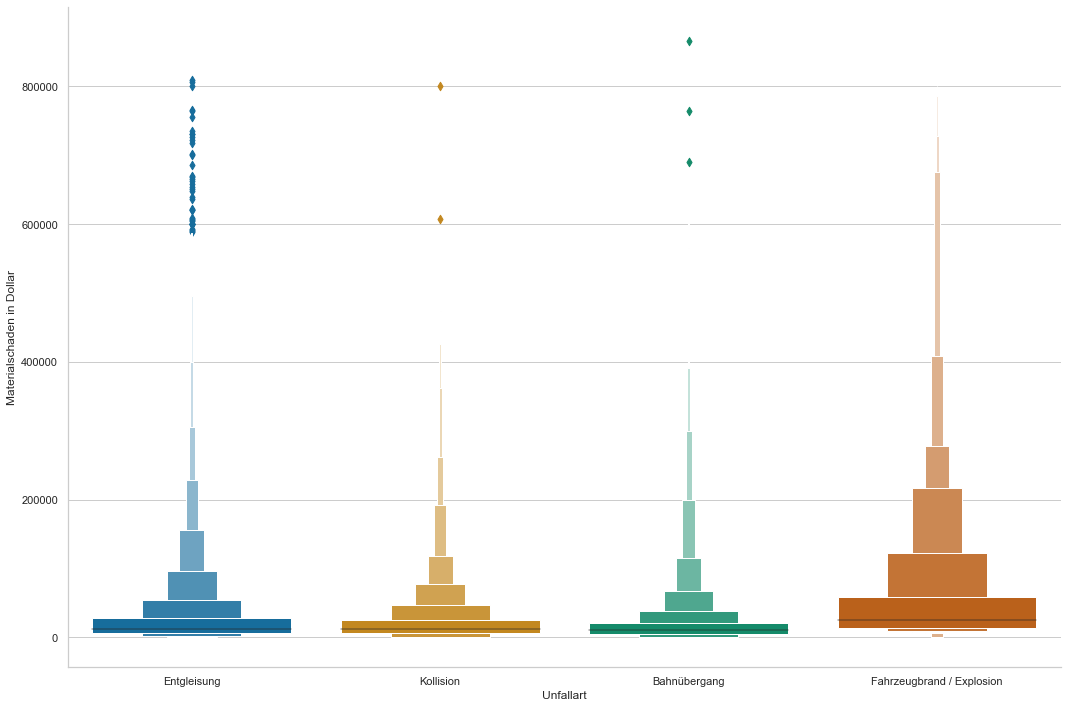

In [68]:
ax = sns.catplot(y='EQPDMG', x='ACCIDENT_TYPE', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallart")
plt.savefig('Images/Boxplot_Material_Unfallart.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Streckenart <a class="anchor" id="typtrk"></a>

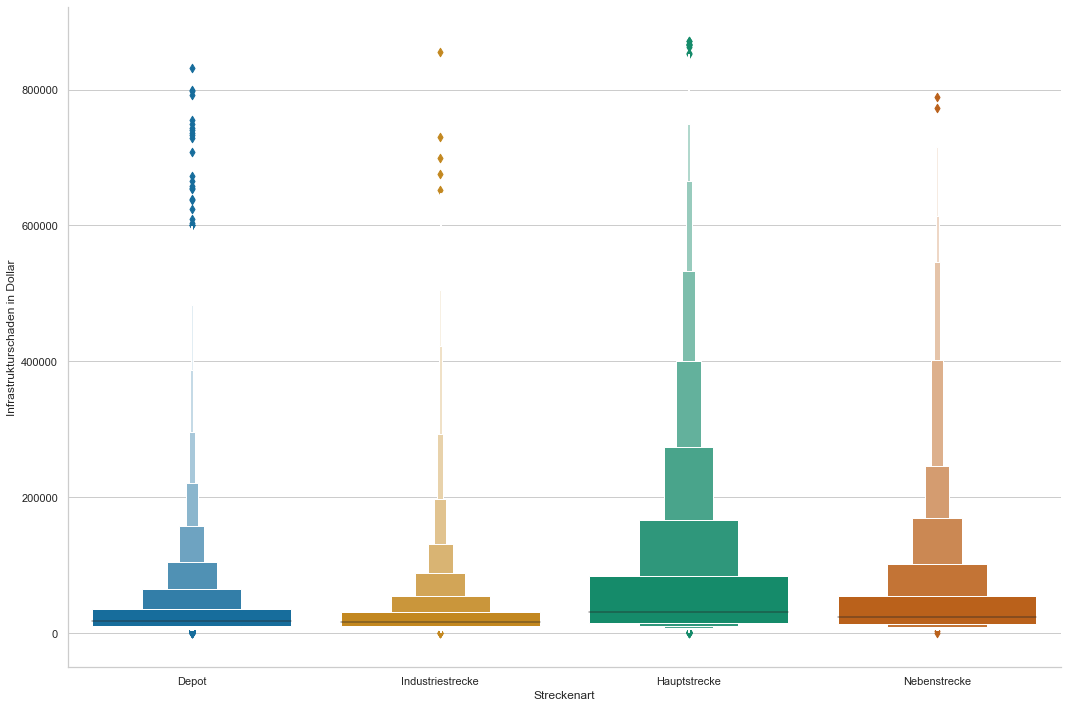

In [69]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='TYPTRK', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Streckenart")
plt.savefig('Images/Boxplot_Infrastruktur_Streckenart.png', bbox_inches='tight')




#### Boxenplot Materialschaden und Streckenart

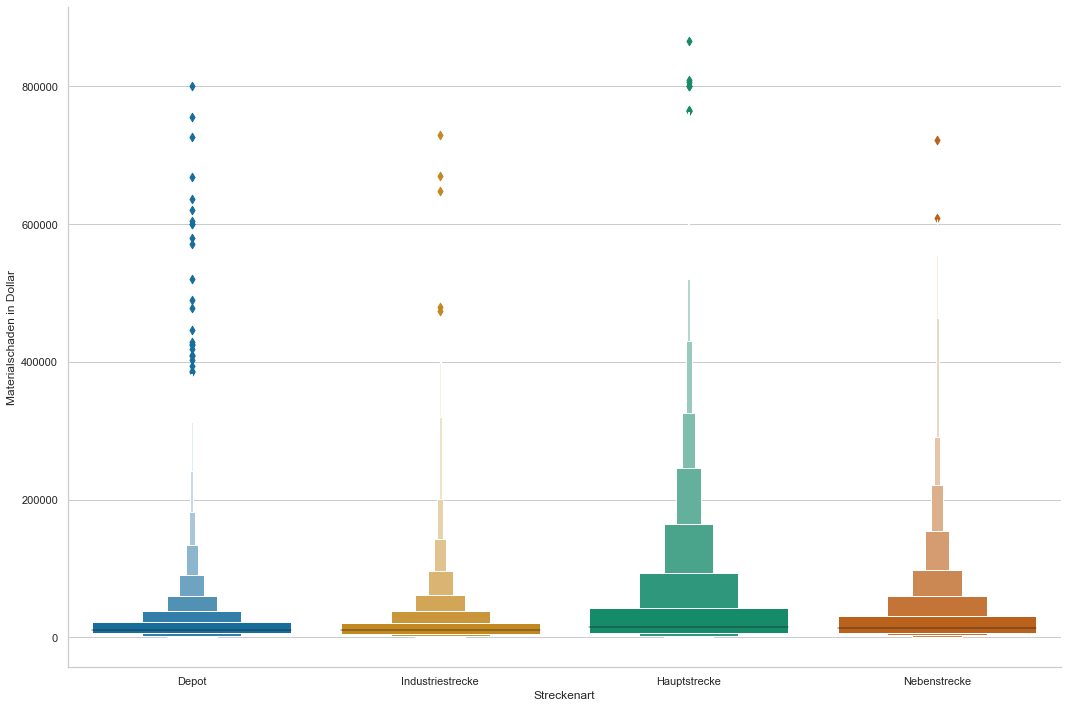

In [70]:
ax = sns.catplot(y='EQPDMG', x='TYPTRK', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Streckenart")
plt.savefig('Images/Boxplot_Material_Streckenart.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Unfallursache <a class="anchor" id="cause"></a>

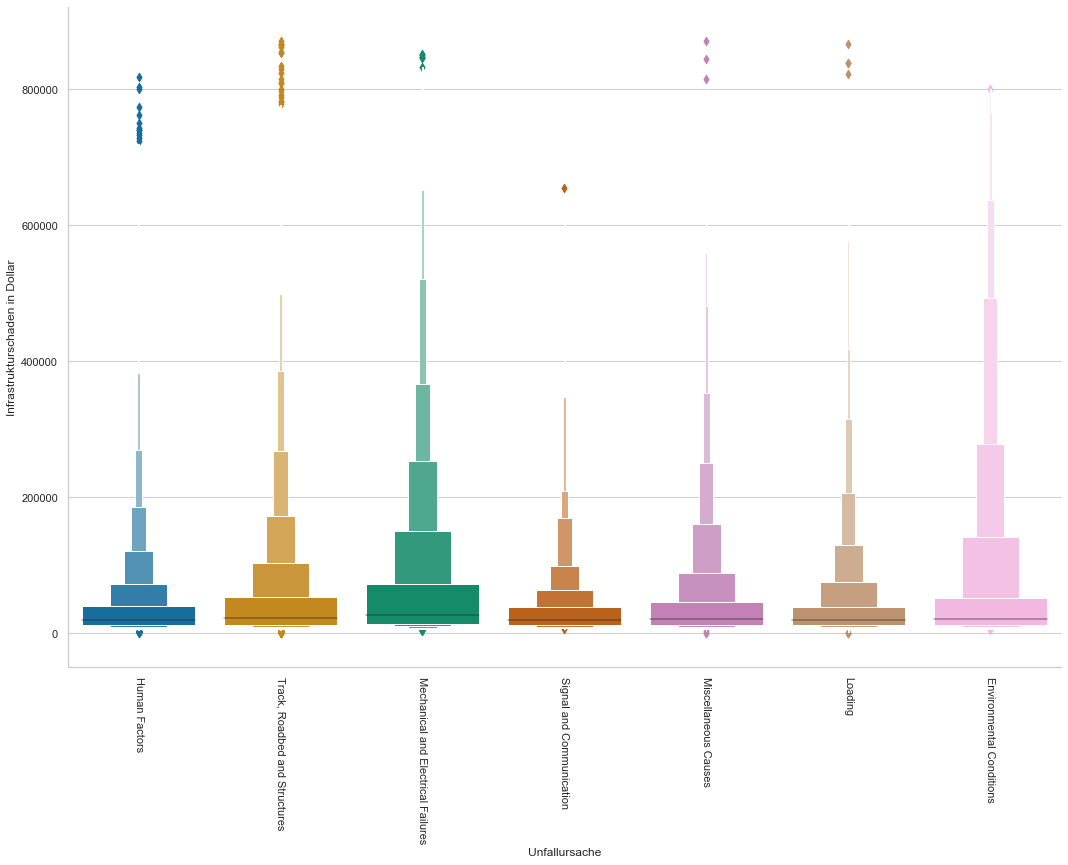

In [71]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCCAUSE_LVL2', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallursache")
plt.savefig('Images/Boxplot_Infrastruktur_Unfallursache.png', bbox_inches='tight')




#### Boxenplot Materialschaden und Unfallursache

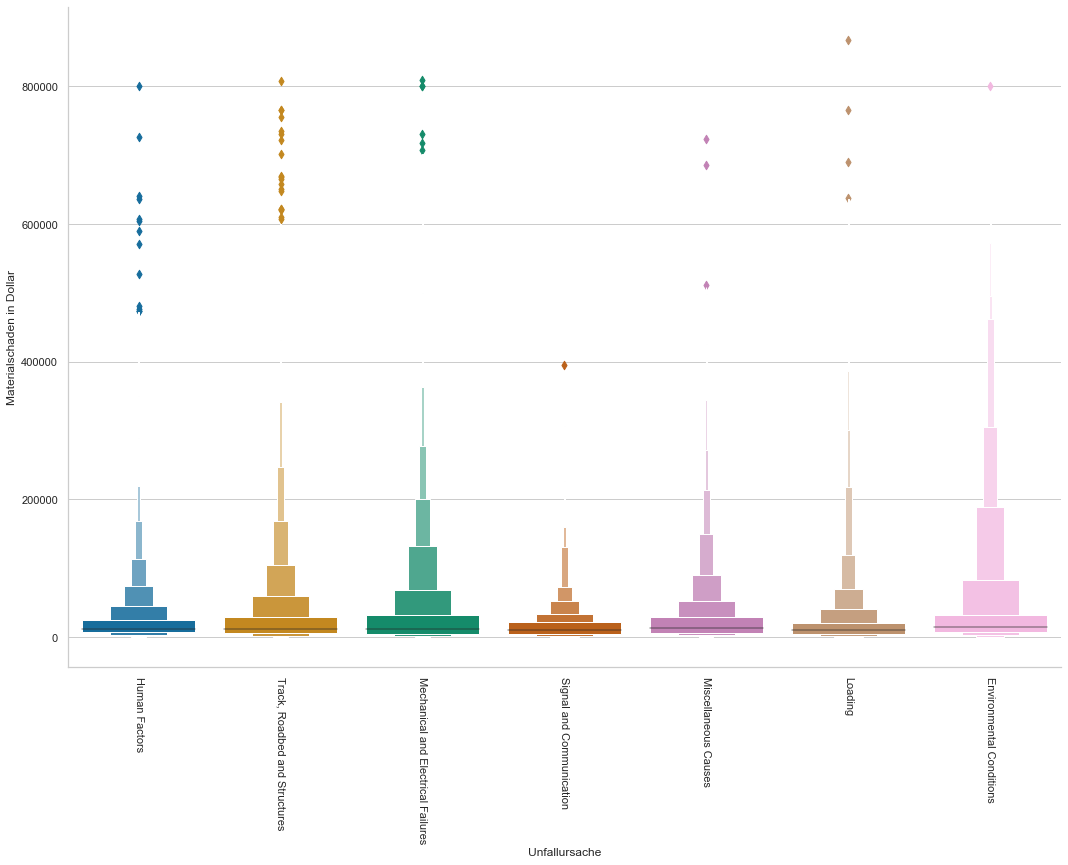

In [72]:
ax = sns.catplot(y='EQPDMG', x='ACCCAUSE_LVL2', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
for x in ax.axes.flat:
    for label in x.get_xticklabels():
        label.set_rotation(-90)
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallursache")
plt.savefig('Images/Boxplot_Material_Unfallursache.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Unfallschwere <a class="anchor" id="unfallsignifikanz"></a>


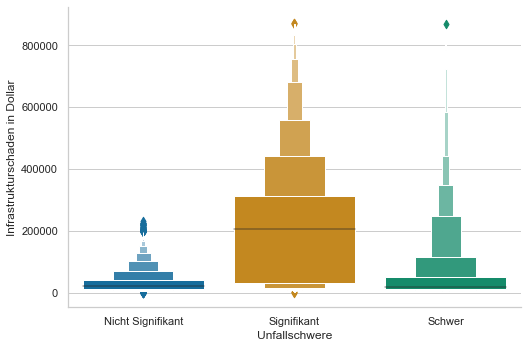

In [73]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='ACCTYPE', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Unfallschwere")
plt.savefig('Images/Boxplot_Infrastruktur_Unfallschwere.png', bbox_inches='tight')





#### Boxenplot Materialschaden und Unfallschwere

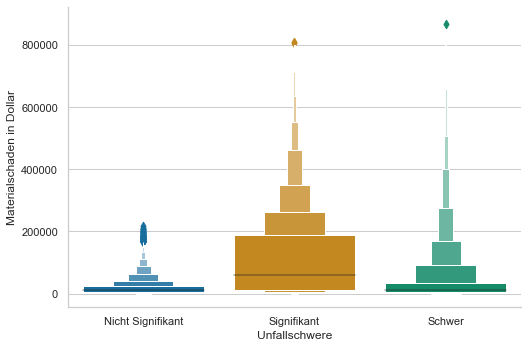

In [74]:
ax = sns.catplot(y='EQPDMG', x='ACCTYPE', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Unfallschwere")
plt.savefig('Images/Boxplot_Material_Unfallschwere.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Wetter <a class="anchor" id="wetter"></a>


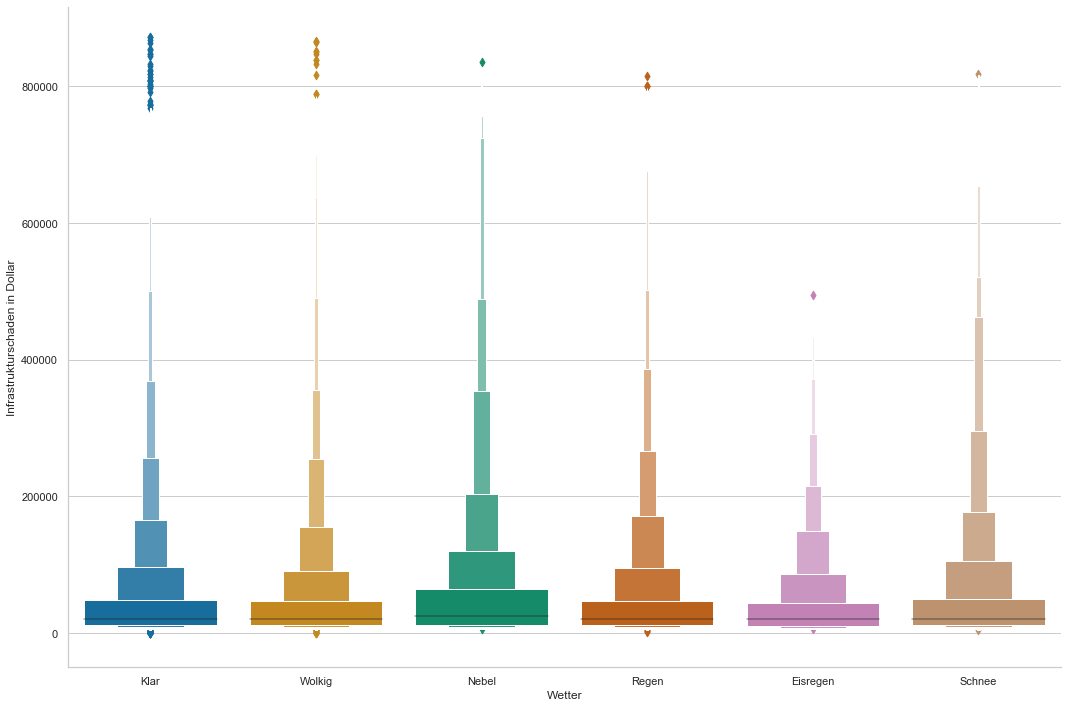

In [75]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='WEATHER', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Wetter")
plt.savefig('Images/Boxplot_Infrastruktur_Wetter.png', bbox_inches='tight')




#### Boxenplot Materialschaden und Wetter

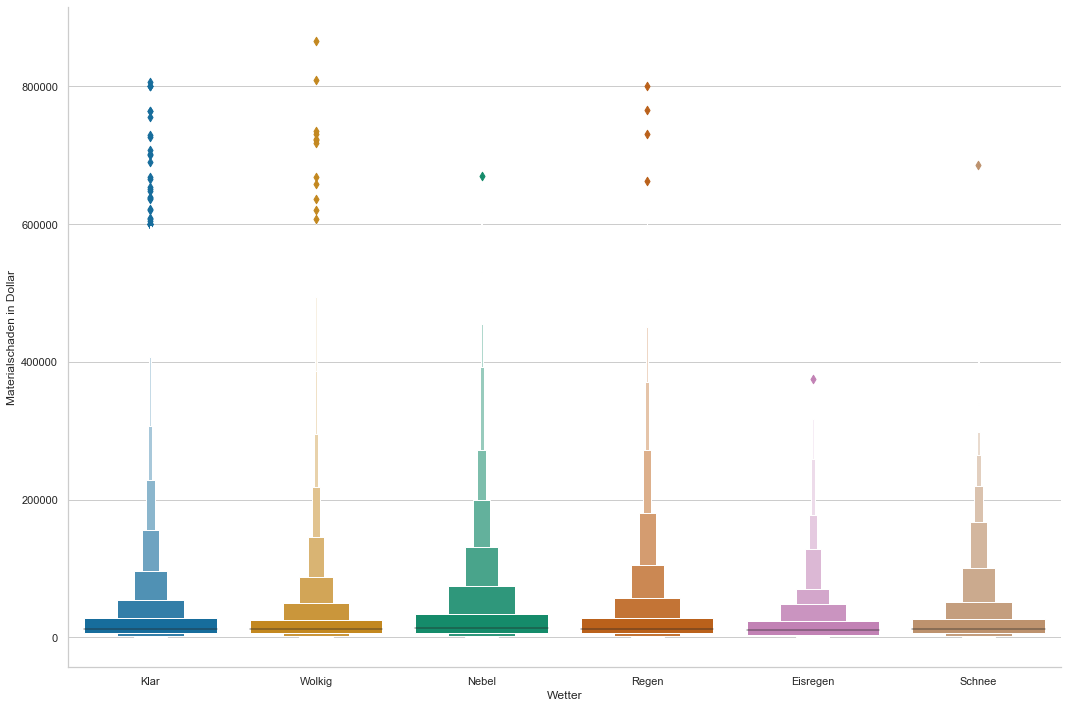

In [76]:
ax = sns.catplot(y='EQPDMG', x='WEATHER', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Wetter")
plt.savefig('Images/Boxplot_Material_Wetter.png', bbox_inches='tight')




#### Boxenplot Infrastrukturschaden und Temperatur <a class="anchor" id="temp"></a>


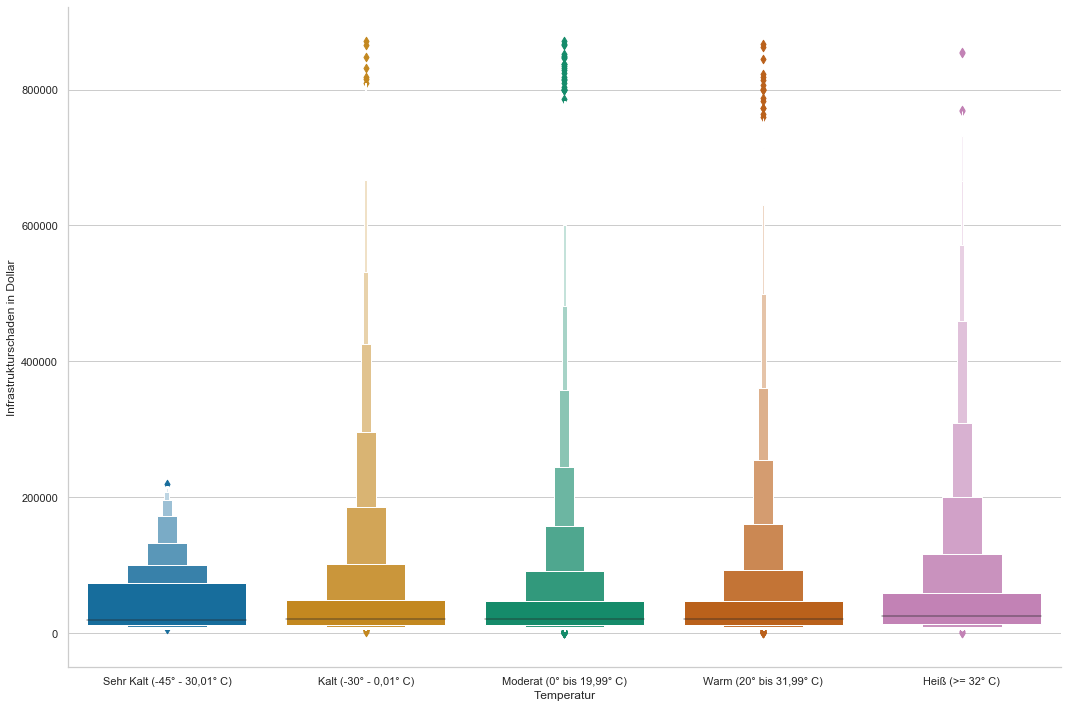

In [77]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='TEMP_CLUSTER', data=df, palette="colorblind", order=temp_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Temperatur")
plt.savefig('Images/Boxplot_Infrastruktur_Temperatur.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Temperatur

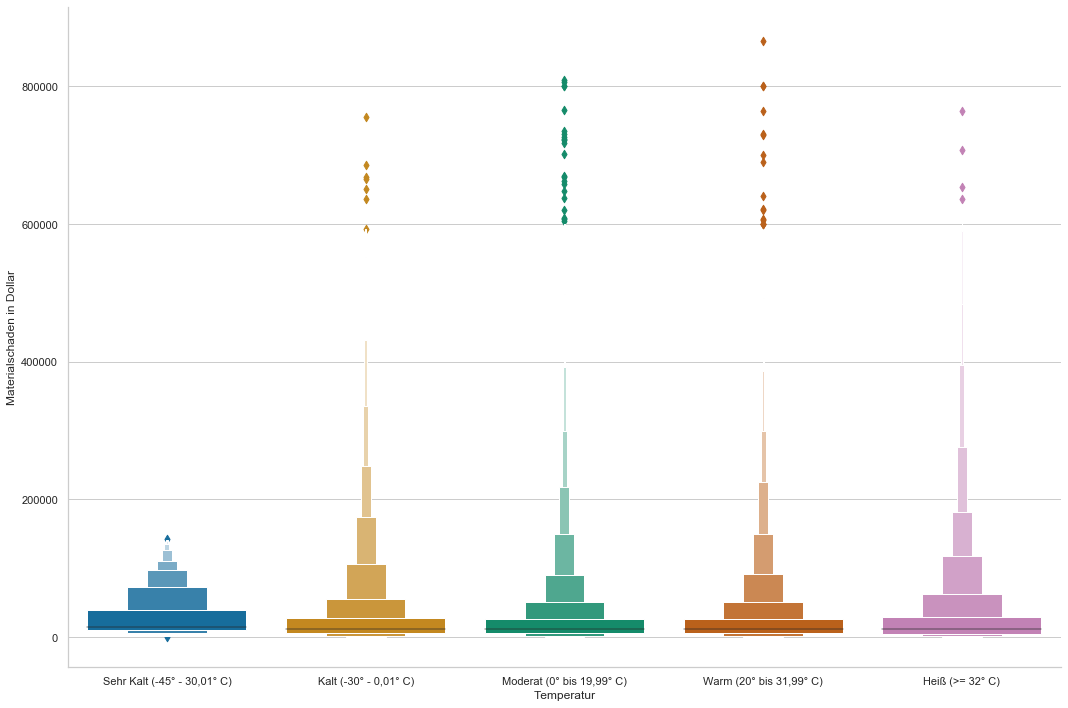

In [78]:
ax = sns.catplot(y='EQPDMG', x='TEMP_CLUSTER', data=df, palette="colorblind", order=temp_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Temperatur")
plt.savefig('Images/Boxplot_Material_Temperatur.png', bbox_inches='tight')



#### Boxenplot Infrastrukturschaden und Sichtbarkeit <a class="anchor" id="vis"></a>


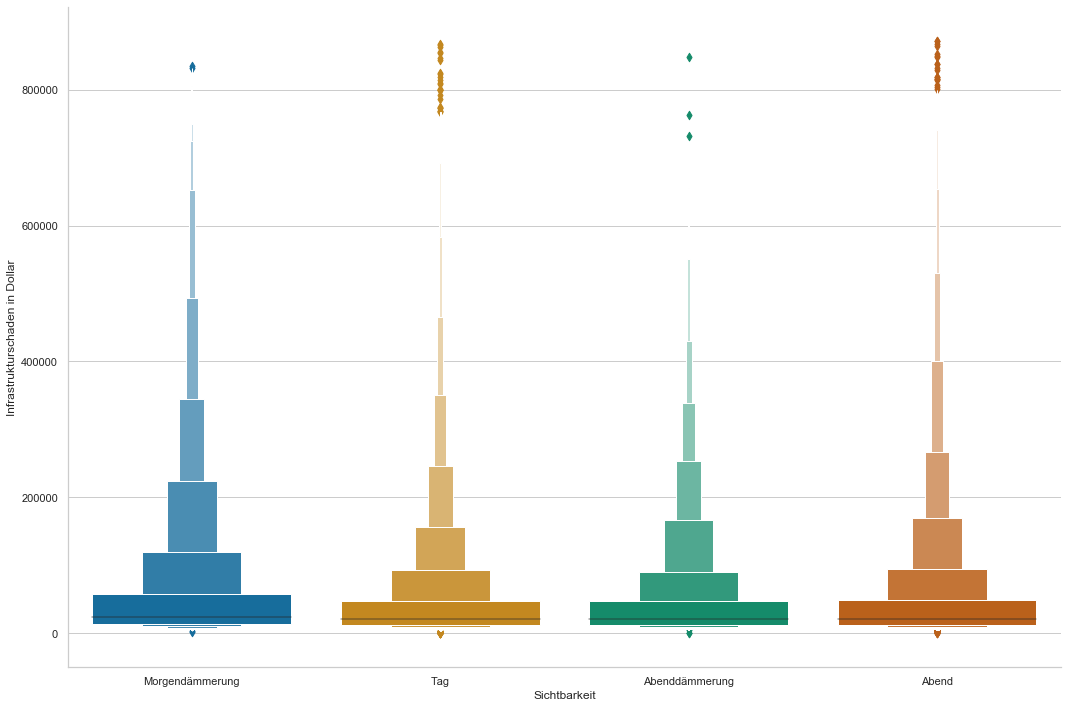

In [79]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='VISIBLTY', data=df, palette="colorblind", kind='boxen', order=vis_order, height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Sichtbarkeit")
plt.savefig('Images/Boxplot_Infrastruktur_Sichtbarkeit.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Temperatur

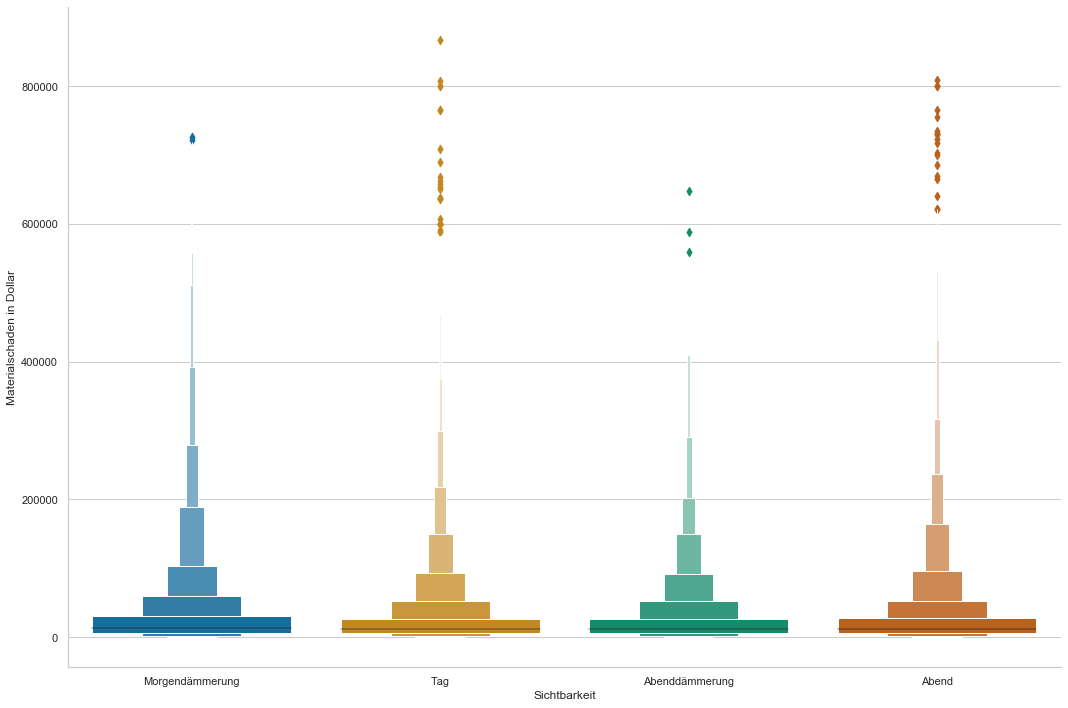

In [80]:
ax = sns.catplot(y='EQPDMG', x='VISIBLTY', data=df, palette="colorblind", order=vis_order, kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Sichtbarkeit")
plt.savefig('Images/Boxplot_Material_Sichtbarkeit.png', bbox_inches='tight')



#### Boxenplot Infrastrukturschaden und Jahreszeit <a class="anchor" id="jahreszeit"></a>


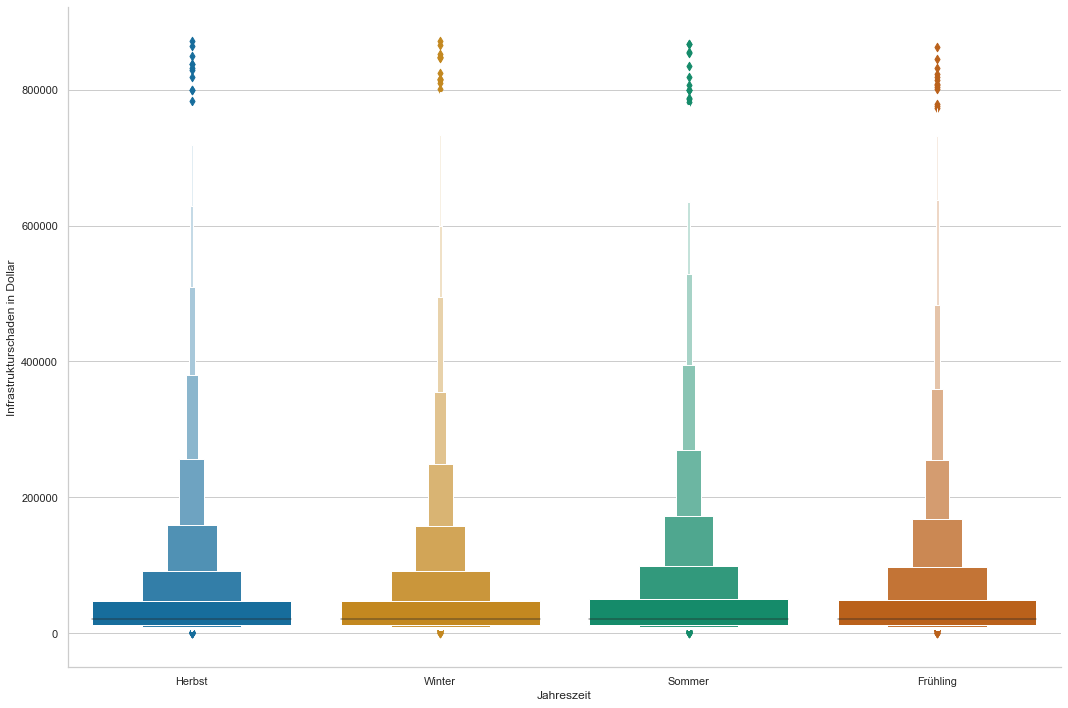

In [81]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='Jahreszeit', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Jahreszeit")
plt.savefig('Images/Boxplot_Infrastruktur_Jahreszeit.png', bbox_inches='tight')



#### Boxenplot Infrastrukturschaden und Jahreszeit (nach Unfallursache)

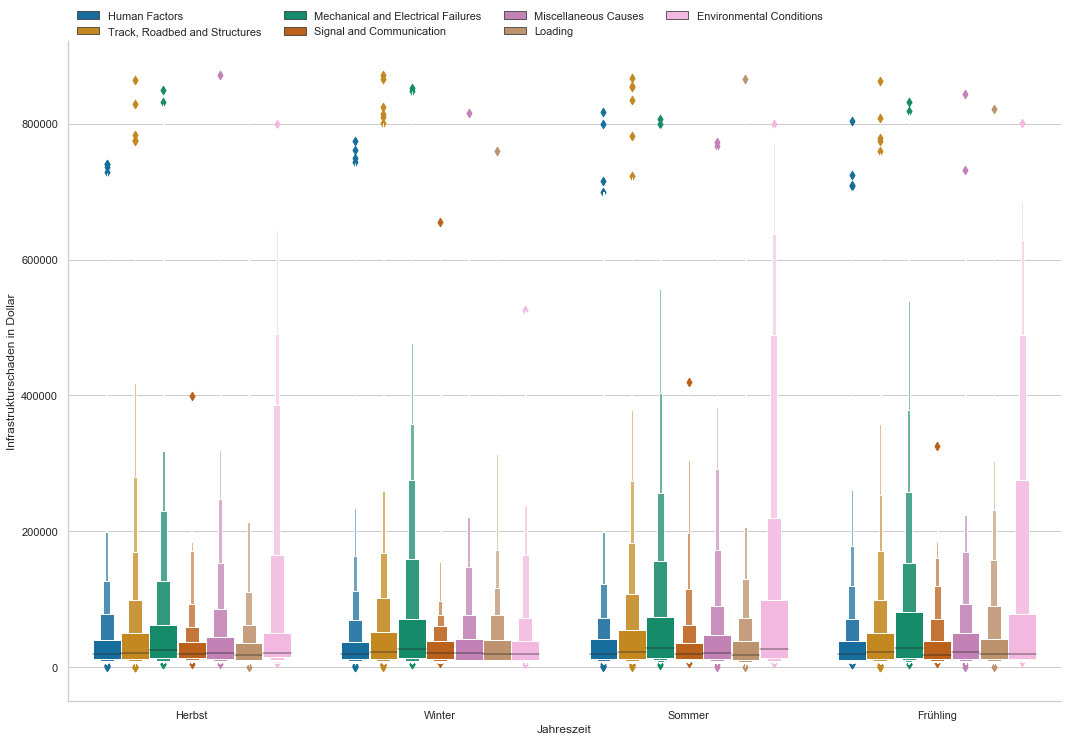

In [82]:
bp = sns.catplot(y='INFRASTRUCTURE_DMG', x='Jahreszeit', data=df, palette="colorblind", hue='ACCCAUSE_LVL2', kind="boxen", legend=False, height=10, aspect=1.5)
plt.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=4, frameon=False)
bp.set_ylabels("Infrastrukturschaden in Dollar")
bp.set_xlabels("Jahreszeit")
plt.savefig('Images/Boxplot_Infrastruktur_Ursache_Sommer.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Jahreszeit

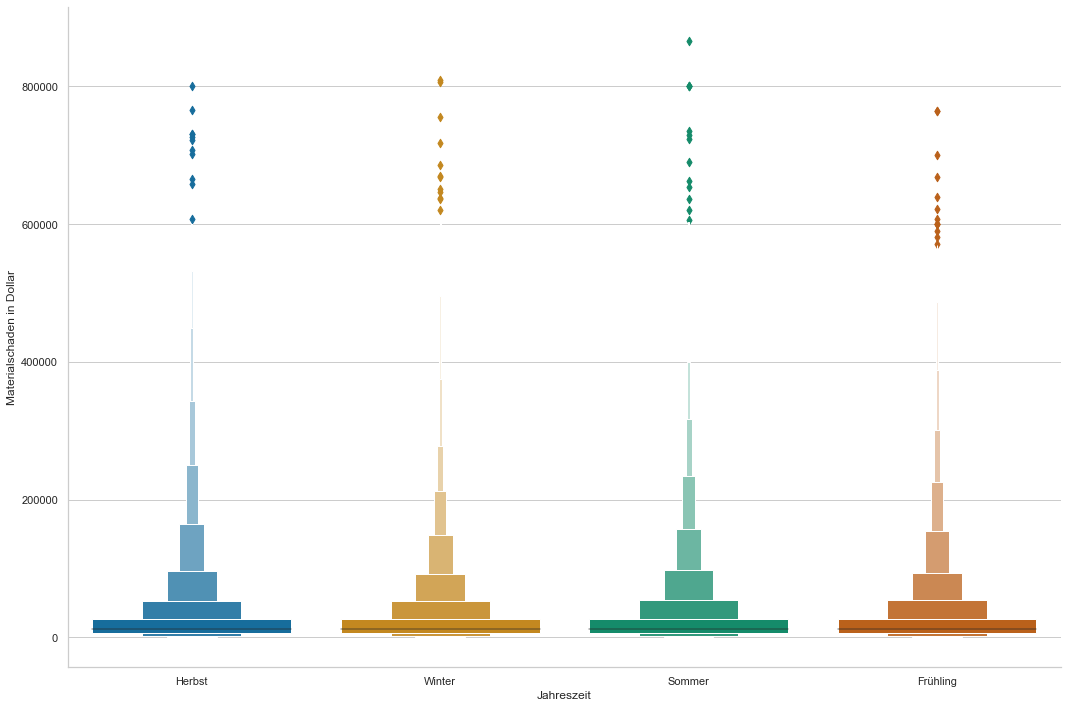

In [83]:
ax = sns.catplot(y='EQPDMG', x='Jahreszeit', data=df, palette="colorblind", kind='boxen', height=10, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Jahreszeit")
plt.savefig('Images/Boxplot_Material_Jahreszeit.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Jahreszeit (nach Unfallursache)

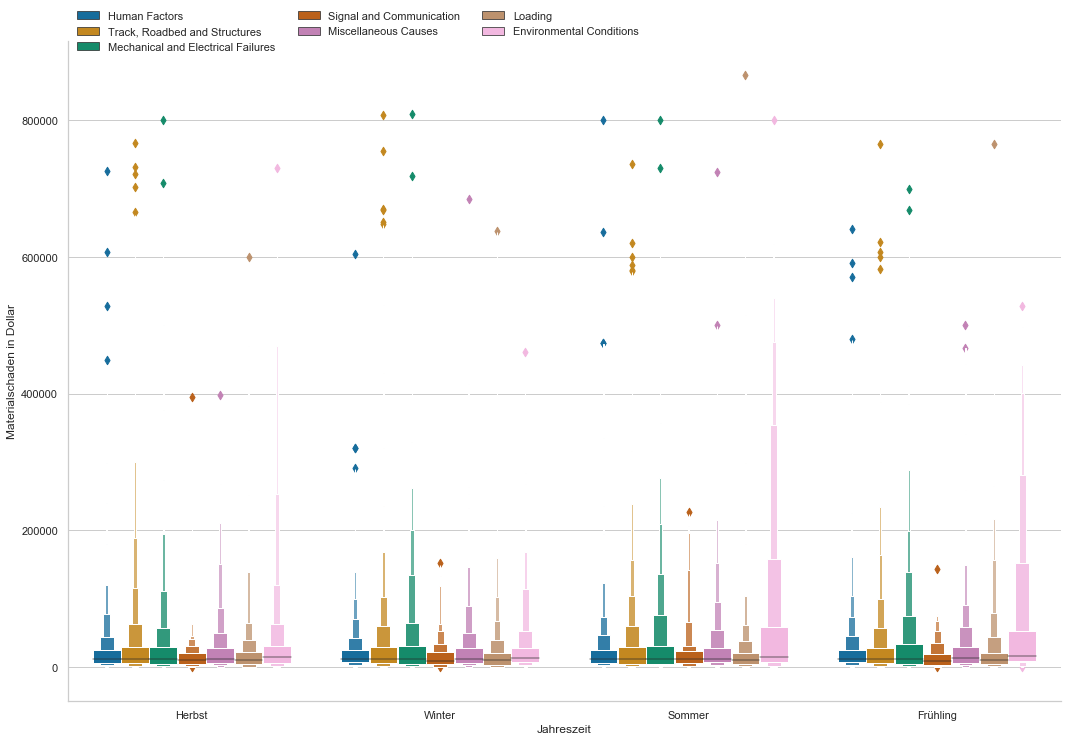

In [84]:
bp = sns.catplot(y='EQPDMG', x='Jahreszeit', data=df, palette="colorblind", hue='ACCCAUSE_LVL2', kind="boxen", legend=False, height=10, aspect=1.5)
plt.legend(bbox_to_anchor=(0, 1.06), loc='upper left', ncol=3, frameon=False)
bp.set_ylabels("Materialschaden in Dollar")
bp.set_xlabels("Jahreszeit")
plt.savefig('Images/Boxplot_Material_Ursache_Sommer.png', bbox_inches='tight')
plt.show()



#### Boxenplot Infrastrukturschaden und Jahr <a class="anchor" id="jahr"></a>

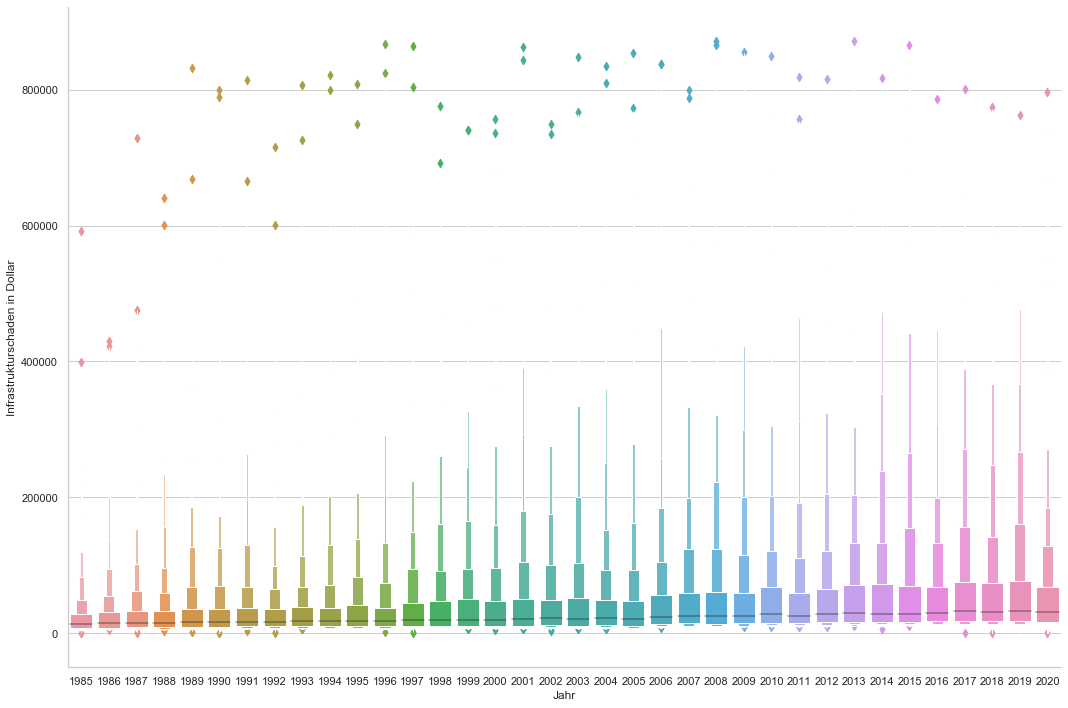

In [85]:
bp = sns.catplot(x="YEAR4", y="INFRASTRUCTURE_DMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Infrastrukturschaden in Dollar', fontsize=12)
plt.savefig('Images/Boxplot_Infrastruktur_Jahr.png', bbox_inches='tight')



#### Boxenplot Materialschaden und Jahr

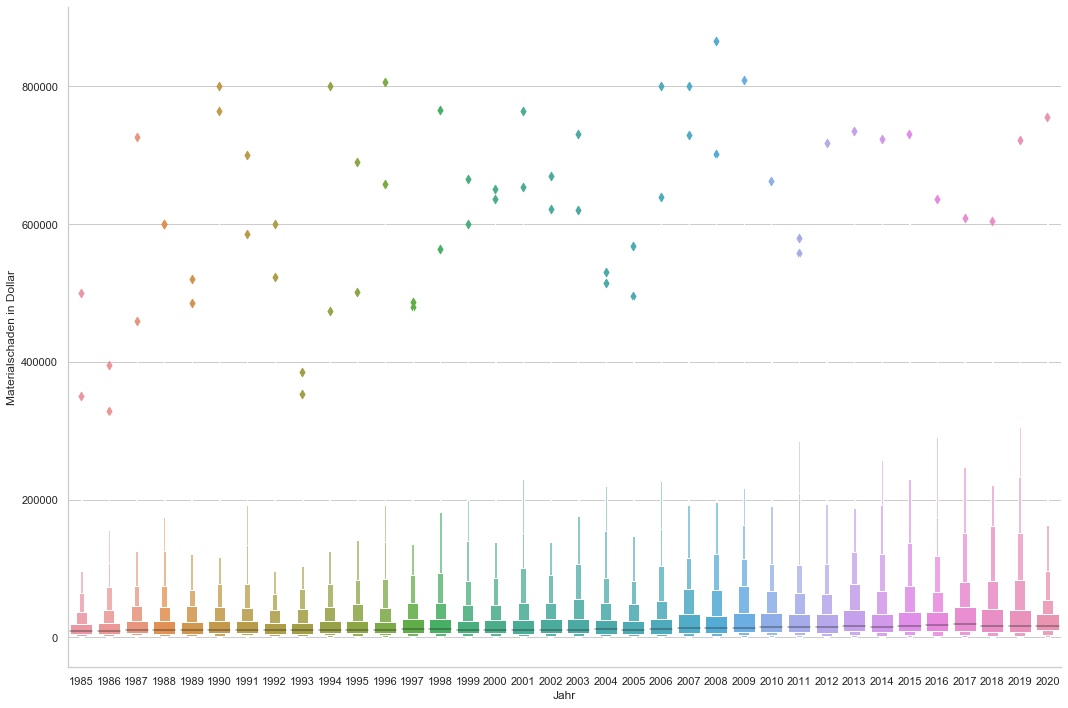

In [86]:
bp = sns.catplot(x="YEAR4", y="EQPDMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Materialschaden in Dollar', fontsize=12)
plt.savefig('Images/Boxplot_Material_Jahr.png', bbox_inches='tight')



#### Boxenplot Streckenschaden und Jahr

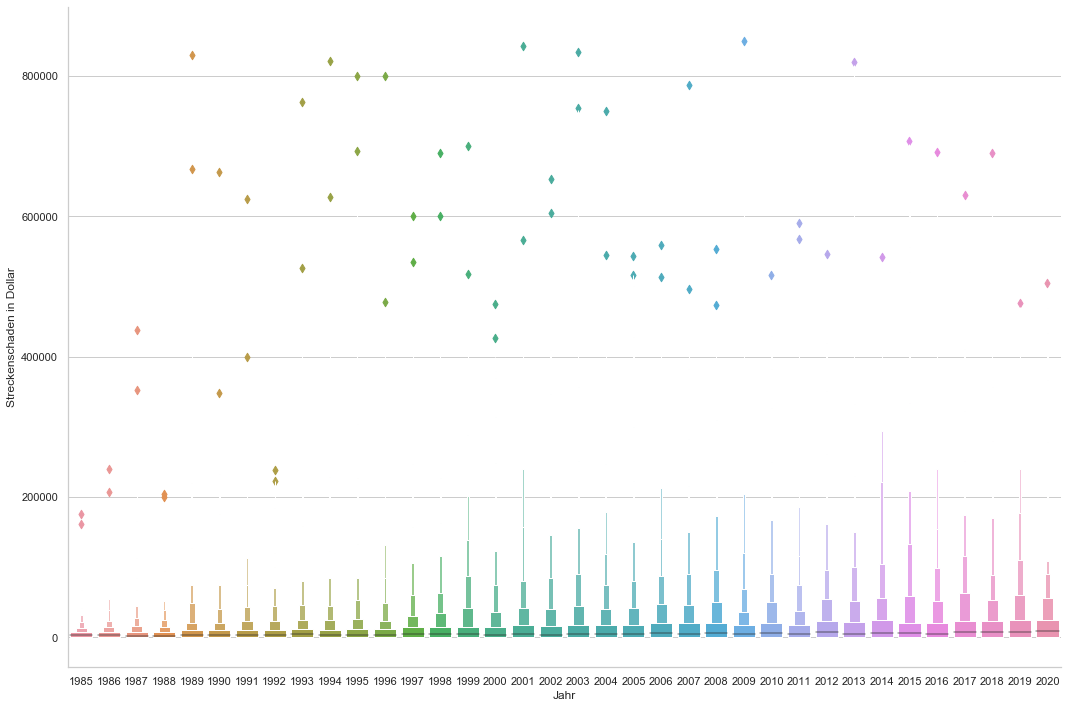

In [87]:
bp = sns.catplot(x="YEAR4", y="TRKDMG", data=df, kind="boxen", height=10, aspect=1.5)
bp.set_xlabels('Jahr', fontsize=12)
bp.set_ylabels('Streckenschaden in Dollar', fontsize=12)
plt.savefig('Images/Boxplot_Strecke_Jahr.png', bbox_inches='tight')



#### Boxenplot Infrastrukturschaden und Zug zu schnell? <a class="anchor" id="speed"></a>


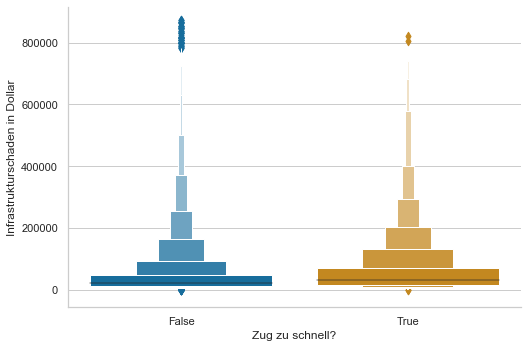

In [88]:
ax = sns.catplot(y='INFRASTRUCTURE_DMG', x='SPD_TOO_HIGH', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Infrastrukturschaden in Dollar")
ax.set_xlabels("Zug zu schnell?")
plt.savefig('Images/Boxplot_Infrastruktur_Zug_zu_schnell.png', bbox_inches='tight')




#### Boxenplot Materialschaden und Zug zu schnell?

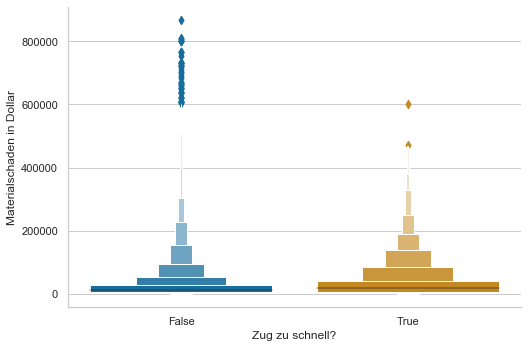

In [89]:
ax = sns.catplot(y='EQPDMG', x='SPD_TOO_HIGH', data=df, palette="colorblind", kind='boxen', height=5, aspect=1.5)
sns.despine()
ax.set_ylabels("Materialschaden in Dollar")
ax.set_xlabels("Zug zu schnell?")
plt.savefig('Images/Boxplot_Material_Zug_zu_schnell.png', bbox_inches='tight')





### Common Statistics <a class="anchor" id="common_statistics"></a>

In [90]:
x_data = df[['YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]
y = df['INFRASTRUCTURE_DMG']

In [91]:
x_data.describe(include=np.number, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED
count,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000,48759.000000
mean,2000.809922,6.422486,2.217334,31.997929,0.022827,13.765582,0.007178,0.075494,2.624664,0.850981,4032.869803,10.474701
std,9.753200,3.430119,1.105530,28.185465,0.274114,18.249114,0.109206,0.264189,2.786185,1.521893,3380.841629,10.702590
min,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10%,1988.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.901359,3.000000
20%,1991.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,932.676137,4.000000
30%,1994.000000,4.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,5.000000
40%,1998.000000,5.000000,2.000000,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2353.030674,5.000000
50%,2001.000000,6.000000,2.000000,25.000000,0.000000,5.000000,0.000000,0.000000,2.000000,0.000000,3200.000000,6.000000
60%,2004.000000,8.000000,2.000000,34.000000,0.000000,10.000000,0.000000,0.000000,3.000000,0.000000,4199.964350,8.000000


In [92]:
x_data.describe(include=np.object, percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,TEMP_CLUSTER,ACCCAUSE_LVL1,ACCIDENT_TYPE,EQUIPMENT_TYPE,TYPTRK,VISIBLTY,WEATHER,STATE,ACCTYPE,Jahreszeit
count,48759,48759,48759,48759,48759,48758,48730,48759,48759,48759
unique,5,31,4,8,4,4,6,50,3,4
top,"Moderat (0° bis 19,99° C)",Track Geometry,Entgleisung,Güterzug,Depot,Tag,Klar,Texas,Nicht Signifikant,Sommer
freq,23240,8471,42905,28020,25180,24879,32062,5691,44070,12867


In [93]:
y.describe(include='all', percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count     48759.000000
mean      49795.775611
std       84128.608386
min           0.000000
10%        8223.000000
20%       10500.000000
30%       13019.000000
40%       16450.000000
50%       21000.000000
60%       28000.000000
70%       39144.200000
80%       60787.400000
90%      113975.200000
max      871834.000000
Name: INFRASTRUCTURE_DMG, dtype: float64

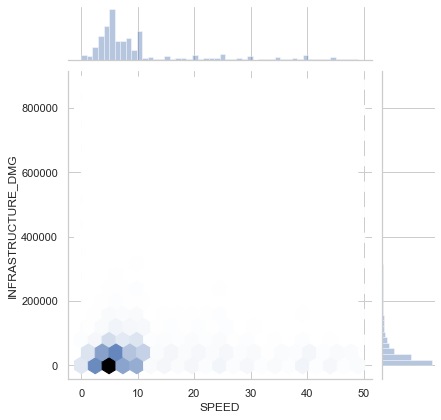

In [94]:
ax = sns.jointplot(x='SPEED', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)
plt.savefig(r"Images/JOINTPLOT_SPEED_INFRASTRUCTURE_DMG.png", bbox_inches='tight')

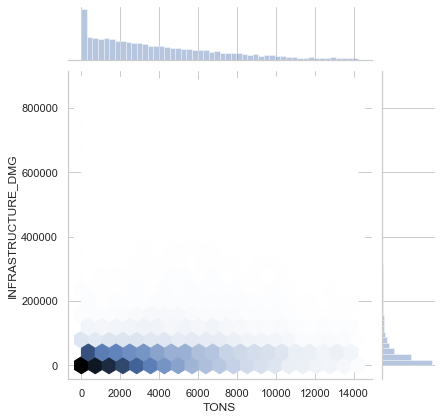

In [95]:
ax = sns.jointplot(x='TONS', y='INFRASTRUCTURE_DMG', data=df, kind='hex', gridsize=20)
plt.savefig(r"Images/JOINTPLOT_TONS_INFRASTRUCTURE_DMG.png", bbox_inches='tight')




### Scattermatrix und Korrelationen der Daten <a class="anchor" id="correlations"></a>
Jahr, Monat, Anzahl der beladenen Frachtwagons und Personenwagons, Gewicht, Temperatur, Geschwindigkeit und Unfallkosten

In [96]:
"""
scattermatrix = scatter_matrix(df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'SPEED']], diagonal='kde', figsize=(18, 18))
n = len(df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'SPEED']].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = scattermatrix[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(-90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.savefig(r"Images/scatterALL.png")
"""

'\nscattermatrix = scatter_matrix(df[[\'INFRASTRUCTURE_DMG\', \'EQPDMG\', \'TRKDMG\', \'YEAR4\', \'MONTH\', \'LOCOMOTIVES1\', \'LOADF1\', \'LOADP1\', \'EMPTYF1\', \'EMPTYP1\',\'LOCOMOTIVES2\', \'LOADF2\', \'EMPTYF2\', \'TONS\', \'SPEED\']], diagonal=\'kde\', figsize=(18, 18))\nn = len(df[[\'INFRASTRUCTURE_DMG\', \'EQPDMG\', \'TRKDMG\', \'YEAR4\', \'MONTH\', \'LOCOMOTIVES1\', \'LOADF1\', \'LOADP1\', \'EMPTYF1\', \'EMPTYP1\',\'LOCOMOTIVES2\', \'LOADF2\', \'EMPTYF2\', \'TONS\', \'SPEED\']].columns)\nfor x in range(n):\n    for y in range(n):\n        # to get the axis of subplots\n        ax = scattermatrix[x, y]\n        # to make x axis name vertical  \n        ax.xaxis.label.set_rotation(-90)\n        # to make y axis name horizontal \n        ax.yaxis.label.set_rotation(0)\n        # to make sure y axis names are outside the plot area\n        ax.yaxis.labelpad = 50\nplt.savefig(r"Images/scatterALL.png")\n'

In [97]:
colormap = plt.cm.RdBu
corr = df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'YEAR4', 'MONTH', 'LOCOMOTIVES1', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOCOMOTIVES2', 'LOADF2', 'EMPTYF2', 'TONS', 'TEMP_CLUSTER', 'SPEED', 'ACCCAUSE_LVL1', 'TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']].corr()
corr

,INFRASTRUCTURE_DMG,EQPDMG,TRKDMG,YEAR4,MONTH,LOCOMOTIVES1,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOCOMOTIVES2,LOADF2,EMPTYF2,TONS,SPEED,SPD_TOO_HIGH
INFRASTRUCTURE_DMG,1.000000,0.784847,0.706504,0.151718,0.002695,0.141941,0.199613,-0.000636,0.040494,-0.006656,-0.026310,0.297871,0.053193,0.210723,0.234264,0.030855
EQPDMG,0.784847,1.000000,0.208766,0.105119,0.010237,0.101881,0.153117,0.019577,0.019356,0.006074,-0.005605,0.301257,0.077360,0.159054,0.188218,0.033250
TRKDMG,0.706504,0.208766,1.000000,0.126460,-0.007079,0.122405,0.154978,-0.024925,0.048430,-0.018258,-0.036543,0.166104,0.012369,0.165230,0.175540,0.002453
YEAR4,0.151718,0.105119,0.126460,1.000000,-0.012614,-0.060715,-0.069785,0.000104,-0.009892,0.019054,0.105088,-0.121246,-0.008068,-0.026618,-0.041783,-0.071444
MONTH,0.002695,0.010237,-0.007079,-0.012614,1.000000,0.009005,0.011627,-0.004607,0.008727,0.009260,-0.003467,-0.008144,0.009417,0.010978,-0.004104,0.002588
LOCOMOTIVES1,0.141941,0.101881,0.122405,-0.060715,0.009005,1.000000,0.445166,-0.073966,0.181329,-0.066094,-0.032934,0.211708,0.023967,0.443891,0.193605,0.013272
LOADF1,0.199613,0.153117,0.154978,-0.069785,0.011627,0.445166,1.000000,-0.093935,0.049718,-0.069212,-0.175561,0.409076,-0.116259,0.910803,0.188804,0.009059
LOADP1,-0.000636,0.019577,-0.024925,0.000104,-0.004607,-0.073966,-0.093935,1.000000,-0.062205,0.074002,0.022367,-0.077750,-0.045680,-0.094139,0.113969,0.003444
EMPTYF1,0.040494,0.019356,0.048430,-0.009892,0.008727,0.181329,0.049718,-0.062205,1.000000,-0.047545,-0.114110,-0.152429,0.423681,0.215958,0.125005,-0.008490
EMPTYP1,-0.006656,0.006074,-0.018258,0.019054,0.009260,-0.066094,-0.069212,0.074002,-0.047545,1.000000,0.062256,-0.056663,-0.034533,-0.071063,-0.007952,-0.005846


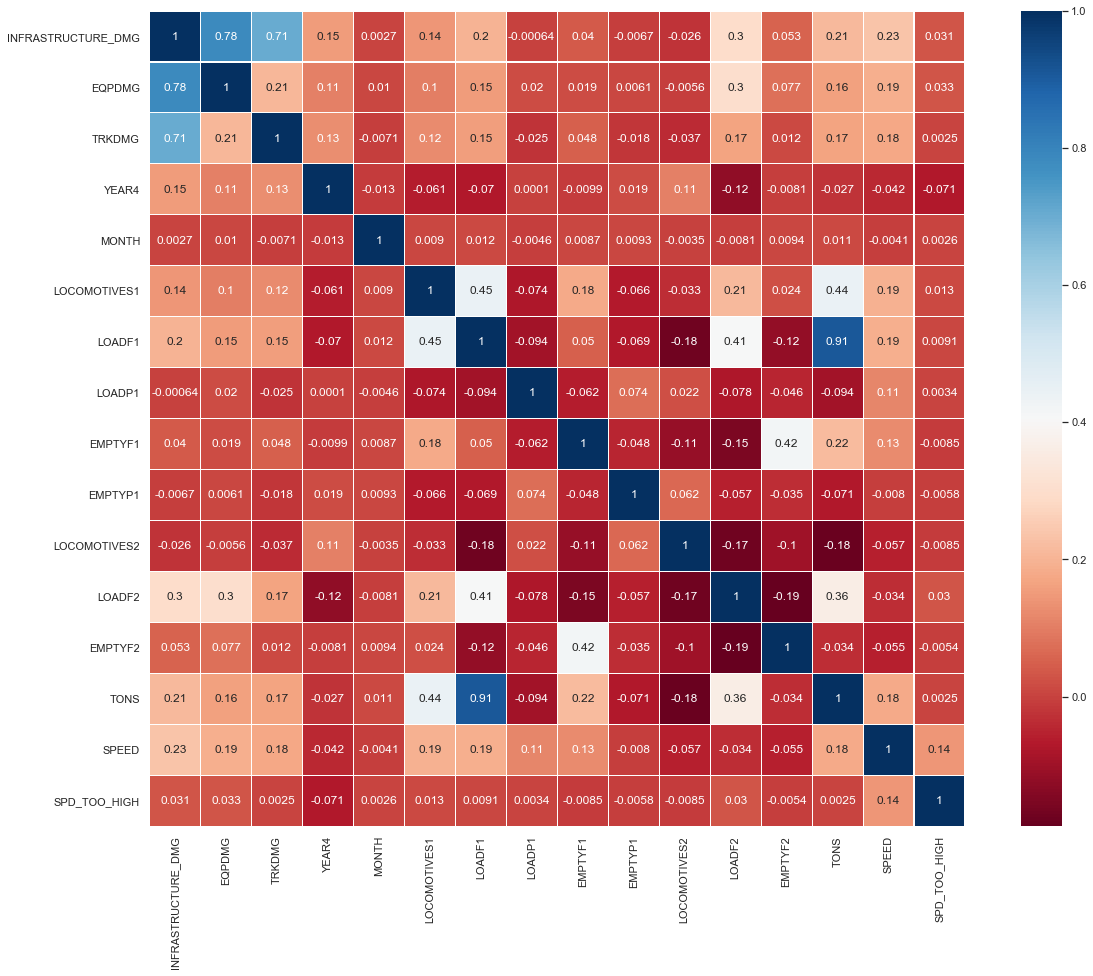

In [98]:
ax=plt.figure(figsize=(20,15)).gca()
ax=sns.heatmap(corr,ax=ax,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(r"Images/corrALL.png", bbox_inches='tight')

In [99]:
corr = df[df['TONS']!=0][['TONS', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1', 'LOADF2', 'EMPTYF2']].corr()
corr

,TONS,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOADF2,EMPTYF2
TONS,1.000000,0.910803,-0.094139,0.215958,-0.071063,0.359311,-0.034211
LOADF1,0.910803,1.000000,-0.093935,0.049718,-0.069212,0.409076,-0.116259
LOADP1,-0.094139,-0.093935,1.000000,-0.062205,0.074002,-0.077750,-0.045680
EMPTYF1,0.215958,0.049718,-0.062205,1.000000,-0.047545,-0.152429,0.423681
EMPTYP1,-0.071063,-0.069212,0.074002,-0.047545,1.000000,-0.056663,-0.034533
LOADF2,0.359311,0.409076,-0.077750,-0.152429,-0.056663,1.000000,-0.189508
EMPTYF2,-0.034211,-0.116259,-0.045680,0.423681,-0.034533,-0.189508,1.000000





### ANOVA <a class="anchor" id="ANOVA"></a>

In [100]:
anova_df =df[['INFRASTRUCTURE_DMG', 'EQPDMG', 'TRKDMG', 'TEMP_CLUSTER', 'ACCCAUSE_LVL1', 'ACCCAUSE_LVL2', 'ACCIDENT_TYPE', 'EQUIPMENT_TYPE', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'STATE', 'SPD_TOO_HIGH', 'ACCTYPE', 'Jahreszeit']]

In [101]:
anova = anova_df.copy()
anova = anova.dropna

In [102]:
def anova(dmg, cat):
    #print ("ANOVA für INFRASTRUCUTURE_DMG ~ %s :" % (cat))
    mod= ols(dmg + ' ~ ' + cat , data=anova_df).fit()
    anova_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    anova_table['EtaSq'] = [esq_sm, 'NaN']
    anova_table
    pair_t = mod.t_test_pairwise(cat)
    anova_table
    pair_t.result_frame
    return [anova_table, pair_t.result_frame]


#### ANOVA Korrelation Temperatur Cluster und Damage

In [103]:
temp_cluster = anova("INFRASTRUCTURE_DMG","TEMP_CLUSTER")

In [104]:
temp_cluster[0]

,sum_sq,df,F,PR(>F),EtaSq
TEMP_CLUSTER,4.191111e+11,4.0,14.820875,4.172291e-12,0.0012145
Residual,3.446716e+14,48754.0,NaN,NaN,NaN


In [105]:
temp_cluster[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
"Kalt (-30° - 0,01° C)-Heiß (>= 32° C)",-5178.936332,1815.293202,-2.852948,4.333399e-03,-8736.933960,-1620.938704,2.572034e-02,True
"Moderat (0° bis 19,99° C)-Heiß (>= 32° C)",-10569.884645,1568.720176,-6.737903,1.624697e-11,-13644.596025,-7495.173266,1.624700e-10,True
"Sehr Kalt (-45° - 30,01° C)-Heiß (>= 32° C)",-11317.083673,16880.194384,-0.670436,5.025833e-01,-44402.478093,21768.310747,9.387817e-01,False
"Warm (20° bis 31,99° C)-Heiß (>= 32° C)",-9632.797903,1611.936799,-5.975915,2.303856e-09,-12792.214411,-6473.381395,2.073470e-08,True
"Moderat (0° bis 19,99° C)-Kalt (-30° - 0,01° C)",-5390.948313,1201.168736,-4.488086,7.203024e-06,-7745.254223,-3036.642404,5.762274e-05,True
"Sehr Kalt (-45° - 30,01° C)-Kalt (-30° - 0,01° C)",-6138.147341,16850.011447,-0.364281,7.156494e-01,-39164.382824,26888.088142,9.770088e-01,False
"Warm (20° bis 31,99° C)-Kalt (-30° - 0,01° C)",-4453.861571,1257.085354,-3.543006,3.959624e-04,-6917.764759,-1989.958383,2.768447e-03,True
"Sehr Kalt (-45° - 30,01° C)-Moderat (0° bis 19,99° C)",-747.199028,16825.233411,-0.044409,9.645782e-01,-33724.869247,32230.471192,9.936449e-01,False
"Warm (20° bis 31,99° C)-Moderat (0° bis 19,99° C)",937.086742,863.630226,1.085056,2.779024e-01,-755.639421,2629.812906,8.036733e-01,False
"Warm (20° bis 31,99° C)-Sehr Kalt (-45° - 30,01° C)",1684.285770,16829.317770,0.100080,9.202809e-01,-31301.389844,34669.961384,9.936449e-01,False


#### ANOVA Korrelation Unfallursachen Cluster und Damage

In [106]:
cause = anova("INFRASTRUCTURE_DMG","ACCCAUSE_LVL2")

In [107]:
cause[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCCAUSE_LVL2,4.499685e+12,6.0,107.347045,5.771331e-135,0.0130391
Residual,3.405910e+14,48752.0,NaN,NaN,NaN


In [108]:
cause[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Human Factors-Environmental Conditions,-30533.629597,3415.806554,-8.938922,4.063795e-19,-37228.653637,-23838.605557,0.000000e+00,True
Loading-Environmental Conditions,-28923.423249,3601.675189,-8.030547,9.919372e-16,-35982.752166,-21864.094332,1.398881e-14,True
Mechanical and Electrical Failures-Environmental Conditions,-201.225386,3511.609139,-0.057303,9.543041e-01,-7084.023706,6681.572934,9.543041e-01,False
Miscellaneous Causes-Environmental Conditions,-22170.282214,3561.812883,-6.224438,4.872101e-10,-29151.480506,-15189.083923,5.359312e-09,True
Signal and Communication-Environmental Conditions,-33474.094347,4907.102975,-6.821559,9.110551e-12,-43092.078231,-23856.110463,1.093272e-10,True
"Track, Roadbed and Structures-Environmental Conditions",-18238.325526,3389.716373,-5.380487,7.462618e-08,-24882.212482,-11594.438570,6.716355e-07,True
Loading-Human Factors,1610.206348,1534.692378,1.049205,2.940891e-01,-1397.810121,4618.222817,6.599021e-01,False
Mechanical and Electrical Failures-Human Factors,30332.404211,1309.433188,23.164530,4.519042e-118,27765.898604,32898.909819,0.000000e+00,True
Miscellaneous Causes-Human Factors,8363.347383,1438.654766,5.813311,6.162986e-09,5543.565848,11183.128918,6.162986e-08,True
Signal and Communication-Human Factors,-2940.464750,3669.179217,-0.801396,4.229065e-01,-10132.102416,4251.172916,6.669630e-01,False


#### ANOVA Korrelation Unfallart und Damage

In [109]:
accidenttype = anova("INFRASTRUCTURE_DMG","ACCIDENT_TYPE")

In [110]:
accidenttype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCIDENT_TYPE,6.917858e+11,3.0,32.644326,4.537299e-21,0.00200465
Residual,3.443989e+14,48755.0,NaN,NaN,NaN


In [111]:
accidenttype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Entgleisung-Bahnübergang,13587.875795,1575.735626,8.623195,6.703268e-18,10499.414046,16676.337544,0.000000e+00,True
Fahrzeugbrand / Explosion-Bahnübergang,27916.822551,3707.898610,7.529015,5.200335e-14,20649.294397,35184.350705,2.597922e-13,True
Kollision-Bahnübergang,9425.730395,2354.843428,4.002699,6.271640e-05,4810.207505,14041.253284,1.254289e-04,True
Fahrzeugbrand / Explosion-Entgleisung,14328.946756,3405.120978,4.208058,2.580350e-05,7654.866589,21003.026923,7.740851e-05,True
Kollision-Entgleisung,-4162.145400,1841.636321,-2.260026,2.382405e-02,-7771.775873,-552.514927,2.382405e-02,True
Kollision-Fahrzeugbrand / Explosion,-18491.092156,3828.471455,-4.829889,1.370230e-06,-25994.944610,-10987.239702,5.480910e-06,True


#### ANOVA Korrelation Zugart und Damage

In [112]:
eqtype = anova("INFRASTRUCTURE_DMG","EQUIPMENT_TYPE")

In [113]:
eqtype[0]

,sum_sq,df,F,PR(>F),EtaSq
EQUIPMENT_TYPE,8.908014e+12,7.0,184.540214,4.191752e-271,0.0258135
Residual,3.361827e+14,48751.0,NaN,NaN,NaN


In [114]:
eqtype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Depot/Rangieren-Arbeitszug,-18689.269829,4336.603393,-4.309656,1.638286e-05,-27189.067324,-10189.472335,0.000328,True
Einzelne Wagen-Arbeitszug,-21127.497572,4756.293091,-4.442009,8.931857e-06,-30449.892182,-11805.102961,0.000196,True
Güterzug-Arbeitszug,8585.820495,4316.852039,1.988908,4.671697e-02,124.735905,17046.905086,0.488193,False
Lokomotive-Arbeitszug,-21110.682854,4796.336496,-4.401418,1.077737e-05,-30511.563045,-11709.802663,0.000226,True
Nahverkehrszug-Arbeitszug,-8022.117685,9704.039475,-0.826678,4.084235e-01,-27042.157780,10997.922410,0.877526,False
Personenzug-Arbeitszug,-7372.957970,5836.234835,-1.263307,2.064848e-01,-18812.052055,4066.136116,0.842804,False
Wartungszug-Arbeitszug,11988.582391,7617.138291,1.573896,1.155180e-01,-2941.104992,26918.269774,0.740833,False
Einzelne Wagen-Depot/Rangieren,-2438.227742,2156.442355,-1.130671,2.581990e-01,-6664.882030,1788.426546,0.842804,False
Güterzug-Depot/Rangieren,27275.090325,814.328672,33.493958,3.439966e-243,25678.995828,28871.184821,0.000000,True
Lokomotive-Depot/Rangieren,-2421.413025,2243.382145,-1.079358,2.804334e-01,-6818.470400,1975.644351,0.842804,False


#### ANOVA Korrelation Sichtbarkeit und Damage

In [115]:
vis = anova("INFRASTRUCTURE_DMG","VISIBLTY")

In [116]:
vis[0]

,sum_sq,df,F,PR(>F),EtaSq
VISIBLTY,4.004490e+11,3.0,18.880275,3.115109e-12,0.00116042
Residual,3.446894e+14,48754.0,NaN,NaN,NaN


In [117]:
vis[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Abenddämmerung-Abend,-2736.274126,1803.752636,-1.516990,1.292758e-01,-6271.652099,799.103847,2.418393e-01,False
Morgendämmerung-Abend,10896.965738,1913.007120,5.696249,1.231748e-08,7147.447595,14646.483881,6.158740e-08,True
Tag-Abend,-2676.521168,806.732271,-3.317732,9.081802e-04,-4257.726619,-1095.315717,2.722067e-03,True
Morgendämmerung-Abenddämmerung,13633.239864,2485.927273,5.484167,4.174802e-08,8760.790977,18505.688751,1.669921e-07,True
Tag-Abenddämmerung,59.752958,1780.745665,0.033555,9.732321e-01,-3430.531060,3550.036976,9.732321e-01,False
Tag-Morgendämmerung,-13573.486906,1891.329636,-7.176690,7.243461e-13,-17280.516906,-9866.456906,4.345857e-12,True


#### ANOVA Korrelation Wetter und Damage

In [118]:
weather = anova("INFRASTRUCTURE_DMG","WEATHER")

In [119]:
weather[0]

,sum_sq,df,F,PR(>F),EtaSq
WEATHER,1.592236e+11,5.0,4.498932,0.000422,0.000461462
Residual,3.448824e+14,48724.0,NaN,NaN,NaN


In [120]:
weather[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Klar-Eisregen,4415.631162,8930.401858,0.494449,0.620991,-13088.069660,21919.331985,0.970921,False
Nebel-Eisregen,18252.974001,9614.982568,1.898389,0.057651,-592.513688,37098.461691,0.413988,False
Regen-Eisregen,4909.322206,9039.205406,0.543114,0.587054,-12807.634951,22626.279362,0.970921,False
Schnee-Eisregen,8120.966695,9285.216366,0.874613,0.381789,-10078.175061,26320.108451,0.909701,False
Wolkig-Eisregen,2597.395238,8951.832747,0.290152,0.771701,-14948.310397,20143.100874,0.970921,False
Nebel-Klar,13837.342839,3624.548228,3.817674,0.000135,6733.182376,20941.503303,0.001887,True
Regen-Klar,493.691043,1548.126114,0.318896,0.749807,-2540.655760,3528.037846,0.970921,False
Schnee-Klar,3705.335533,2627.680166,1.410117,0.158512,-1444.950895,8855.621961,0.748589,False
Wolkig-Klar,-1818.235924,908.168270,-2.002091,0.045280,-3598.257242,-38.214606,0.370844,False
Regen-Nebel,-13343.651796,3884.907579,-3.434741,0.000594,-20958.119887,-5729.183705,0.007690,True


#### ANOVA Korrelation zu hoher Geschwindigkeit und Damage

In [121]:
spd = anova("INFRASTRUCTURE_DMG","SPD_TOO_HIGH")

In [122]:
spd[0]

,sum_sq,df,F,PR(>F),EtaSq
SPD_TOO_HIGH,3.285420e+11,1.0,46.463106,9.444286e-12,0.000952045
Residual,3.447622e+14,48757.0,NaN,NaN,NaN


In [123]:
spd[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
True-False,14522.568531,2130.538142,6.816385,9.444286e-12,10346.68684,18698.450221,9.444334e-12,True


#### ANOVA Korrelation Streckenart und Damage

In [124]:
typtrk = anova("INFRASTRUCTURE_DMG","TYPTRK")

In [125]:
typtrk[0]

,sum_sq,df,F,PR(>F),EtaSq
TYPTRK,1.935922e+13,3.0,965.886202,0.0,0.0560989
Residual,3.257315e+14,48755.0,NaN,NaN,NaN


In [126]:
typtrk[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Hauptstrecke-Depot,41884.357071,818.515506,51.171122,0.000000e+00,40280.056331,43488.657811,0.000000,True
Industriestrecke-Depot,-3581.610735,1257.275993,-2.848707,4.391568e-03,-6045.887577,-1117.333893,0.004392,True
Nebenstrecke-Depot,17900.693277,1903.758604,9.402817,5.534121e-21,14169.302345,21632.084209,0.000000,True
Industriestrecke-Hauptstrecke,-45465.967806,1311.507664,-34.666948,3.668358e-260,-48036.539408,-42895.396204,0.000000,True
Nebenstrecke-Hauptstrecke,-23983.663794,1940.001611,-12.362703,4.694718e-35,-27786.091479,-20181.236110,0.000000,True
Nebenstrecke-Industriestrecke,21482.304012,2162.031808,9.936165,3.049067e-23,17244.694334,25719.913690,0.000000,True


#### ANOVA Korrelation Signifikanzlevel und Damage

In [127]:
acctype = anova("INFRASTRUCTURE_DMG","ACCTYPE")

In [128]:
acctype[0]

,sum_sq,df,F,PR(>F),EtaSq
ACCTYPE,1.376355e+14,2.0,16173.49707,0.0,0.398838
Residual,2.074553e+14,48756.0,NaN,NaN,NaN


In [129]:
acctype[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Schwer-Nicht Signifikant,25721.369515,3179.346179,8.090144,6.095695e-16,19489.810812,31952.928217,5.551115e-16,True
Signifikant-Nicht Signifikant,188129.137712,1046.151178,179.829781,0.000000e+00,186078.668178,190179.607246,0.000000e+00,True
Signifikant-Schwer,162407.768197,3318.067801,48.946489,0.000000e+00,155904.313361,168911.223033,0.000000e+00,True


#### ANOVA Korrelation Jahreszeit und Damage

In [130]:
jahreszeit = anova("INFRASTRUCTURE_DMG","Jahreszeit")

In [131]:
jahreszeit[0]

,sum_sq,df,F,PR(>F),EtaSq
Jahreszeit,6.956564e+10,3.0,3.276778,0.020073,0.000201587
Residual,3.450212e+14,48755.0,NaN,NaN,NaN


In [132]:
jahreszeit[1]

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Herbst-Frühling,-1090.724287,1096.205957,-0.994999,0.319741,-3239.301821,1057.853247,0.537248,False
Sommer-Frühling,1567.817118,1059.799629,1.479352,0.139053,-509.403553,3645.037789,0.450578,False
Winter-Frühling,-1473.675701,1071.999873,-1.374698,0.169232,-3574.809006,627.457603,0.450578,False
Sommer-Herbst,2658.541405,1085.568178,2.448986,0.014329,530.814051,4786.268760,0.069623,False
Winter-Herbst,-382.951414,1097.482002,-0.348936,0.727139,-2534.030014,1768.127186,0.727139,False
Winter-Sommer,-3041.492820,1061.119455,-2.866306,0.004155,-5121.300367,-961.685272,0.024671,True


In [133]:
temp_cluster_eqpdmg = anova("EQPDMG","TEMP_CLUSTER")
cause_eqpdmg = anova("EQPDMG","ACCCAUSE_LVL2")
accidenttype_eqpdmg = anova("EQPDMG","ACCIDENT_TYPE")
eqtype_eqpdmg = anova("EQPDMG","EQUIPMENT_TYPE")
vis_eqpdmg = anova("EQPDMG","VISIBLTY")
weather_eqpdmg = anova("EQPDMG","WEATHER")
spd_eqpdmg = anova("EQPDMG","SPD_TOO_HIGH")
typtrk_eqpdmg = anova("EQPDMG","TYPTRK")
acctype_eqpdmg = anova("EQPDMG","ACCTYPE")
jahreszeit_eqpdmg = anova("EQPDMG","Jahreszeit")

In [134]:
temp_cluster_trkdmg = anova("TRKDMG","TEMP_CLUSTER")
cause_trkdmg = anova("TRKDMG","ACCCAUSE_LVL2")
accidenttype_trkdmg = anova("TRKDMG","ACCIDENT_TYPE")
eqtype_trkdmg = anova("TRKDMG","EQUIPMENT_TYPE")
vis_trkdmg = anova("TRKDMG","VISIBLTY")
weather_trkdmg = anova("TRKDMG","WEATHER")
spd_trkdmg = anova("TRKDMG","SPD_TOO_HIGH")
typtrk_trkdmg = anova("TRKDMG","TYPTRK")
acctype_trkdmg = anova("TRKDMG","ACCTYPE")
jahreszeit_trkdmg = anova("TRKDMG","Jahreszeit")

In [135]:
compare_anova = [
                                [
                                    temp_cluster[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis[0]["EtaSq"]["VISIBLTY"],
                                    weather[0]["EtaSq"]["WEATHER"],
                                    spd[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk[0]["EtaSq"]["TYPTRK"],
                                    acctype[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit[0]["EtaSq"]["Jahreszeit"]
                                ],
                                [
                                    temp_cluster_eqpdmg[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause_eqpdmg[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype_eqpdmg[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype_eqpdmg[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis_eqpdmg[0]["EtaSq"]["VISIBLTY"],
                                    weather_eqpdmg[0]["EtaSq"]["WEATHER"],
                                    spd_eqpdmg[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk_eqpdmg[0]["EtaSq"]["TYPTRK"],
                                    acctype_eqpdmg[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit_eqpdmg[0]["EtaSq"]["Jahreszeit"]
                                ],
                                [
                                    temp_cluster_trkdmg[0]["EtaSq"]["TEMP_CLUSTER"],
                                    cause_trkdmg[0]["EtaSq"]["ACCCAUSE_LVL2"],
                                    accidenttype_trkdmg[0]["EtaSq"]["ACCIDENT_TYPE"],
                                    eqtype_trkdmg[0]["EtaSq"]["EQUIPMENT_TYPE"],
                                    vis_trkdmg[0]["EtaSq"]["VISIBLTY"],
                                    weather_trkdmg[0]["EtaSq"]["WEATHER"],
                                    spd_trkdmg[0]["EtaSq"]["SPD_TOO_HIGH"],
                                    typtrk_trkdmg[0]["EtaSq"]["TYPTRK"],
                                    acctype_trkdmg[0]["EtaSq"]["ACCTYPE"],
                                    jahreszeit_trkdmg[0]["EtaSq"]["Jahreszeit"]
                                ]
                            ]
pd.DataFrame(compare_anova,columns=["Temperatur", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"], index=["Infrastrukturschaden", "Materialschaden", "Streckenschaden"]).style.format("{:.1g}")

,Temperatur,Ursache,Unfallart,Zugart,Sichtbarkeit,Wetter,Zug zu schnell?,Streckenart,Siginifikanz des Unfalls,Jahreszeit
Infrastrukturschaden,0.001,0.01,0.002,0.03,0.001,0.0005,0.001,0.06,0.4,0.0002
Materialschaden,0.0008,0.006,0.005,0.02,0.0004,0.0006,0.001,0.04,0.2,0.0001
Streckenschaden,0.001,0.02,0.005,0.02,0.001,0.0004,6e-06,0.03,0.2,0.0005


#### ANOVA Heatmap <a class="anchor" id="ANOVA_HEATMAP"></a>

**Interpretation:** Nach Cohen (1988) bei .01 (kleiner Effekt), .06 (mittlerer Effekt) und .14 (großer Effekt)

[Cohen, J. (1988)](http://www.utstat.toronto.edu/~brunner/oldclass/378f16/readings/CohenPower.pdf). Statistical Power Analysis for the Behavioral Sciences.

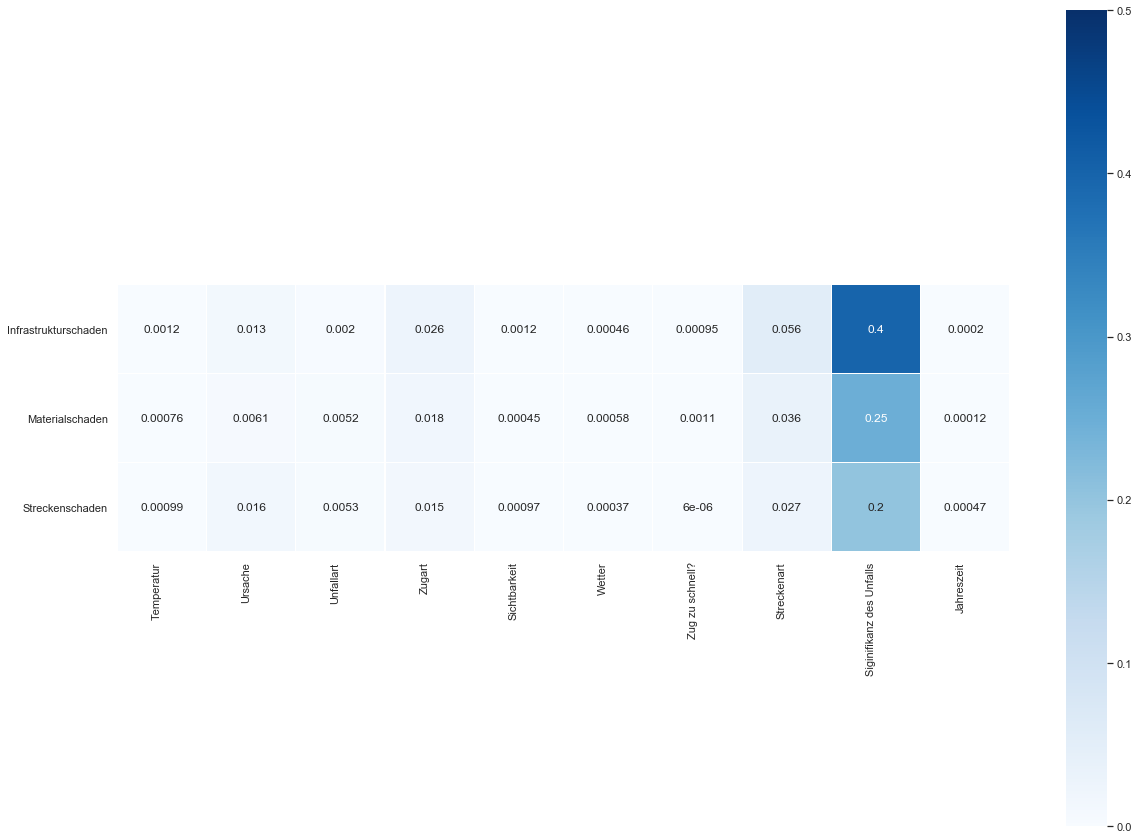

In [136]:
colormap = plt.cm.Blues
ax=plt.figure(figsize=(20,15)).gca()
x_axis_labels = ["Temperatur", "Ursache","Unfallart", "Zugart", "Sichtbarkeit", "Wetter", "Zug zu schnell?", "Streckenart", "Siginifikanz des Unfalls", "Jahreszeit"] # labels for x-axis
y_axis_labels = ["Infrastrukturschaden", "Materialschaden", "Streckenschaden"] # labels for y-axis
ax=sns.heatmap(compare_anova,ax=ax,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmin=0, vmax=0.5);
bottom, top = ax.get_ylim()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', verticalalignment='top')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("Images/ANOVA_Heatmap.png", bbox_inches='tight')